# Effect of Normalization, Feature Extraction and Distance Metrics

In [78]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [79]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("C:/Users/Samhithachowdary/.ipynb_checkpoints/winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("C:/Users/Samhithachowdary/.ipynb_checkpoints/winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [80]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [81]:
print(wine.shape)
wine[DLC].describe()
wine[DLC].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6    0.0  
1      9.5        6    0.0  
2     10.1        6    0.0  
3      9.9        6    0.0  
4      9.9        6    0.0

# Train/Test Data Split

In [82]:
# classify color of wine with all features
X = wine[D].values
y = np.ravel(wine[[C]])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

In [83]:
# classify quality of wine with all features
X = wine[D].values
yq = np.ravel(wine[[L]])


Xq_train, Xq_test, yq_train, yq_test = train_test_split(X, yq, test_size=0.2, random_state = 42) 

# Normalization

### Pairplot of color label without normalization

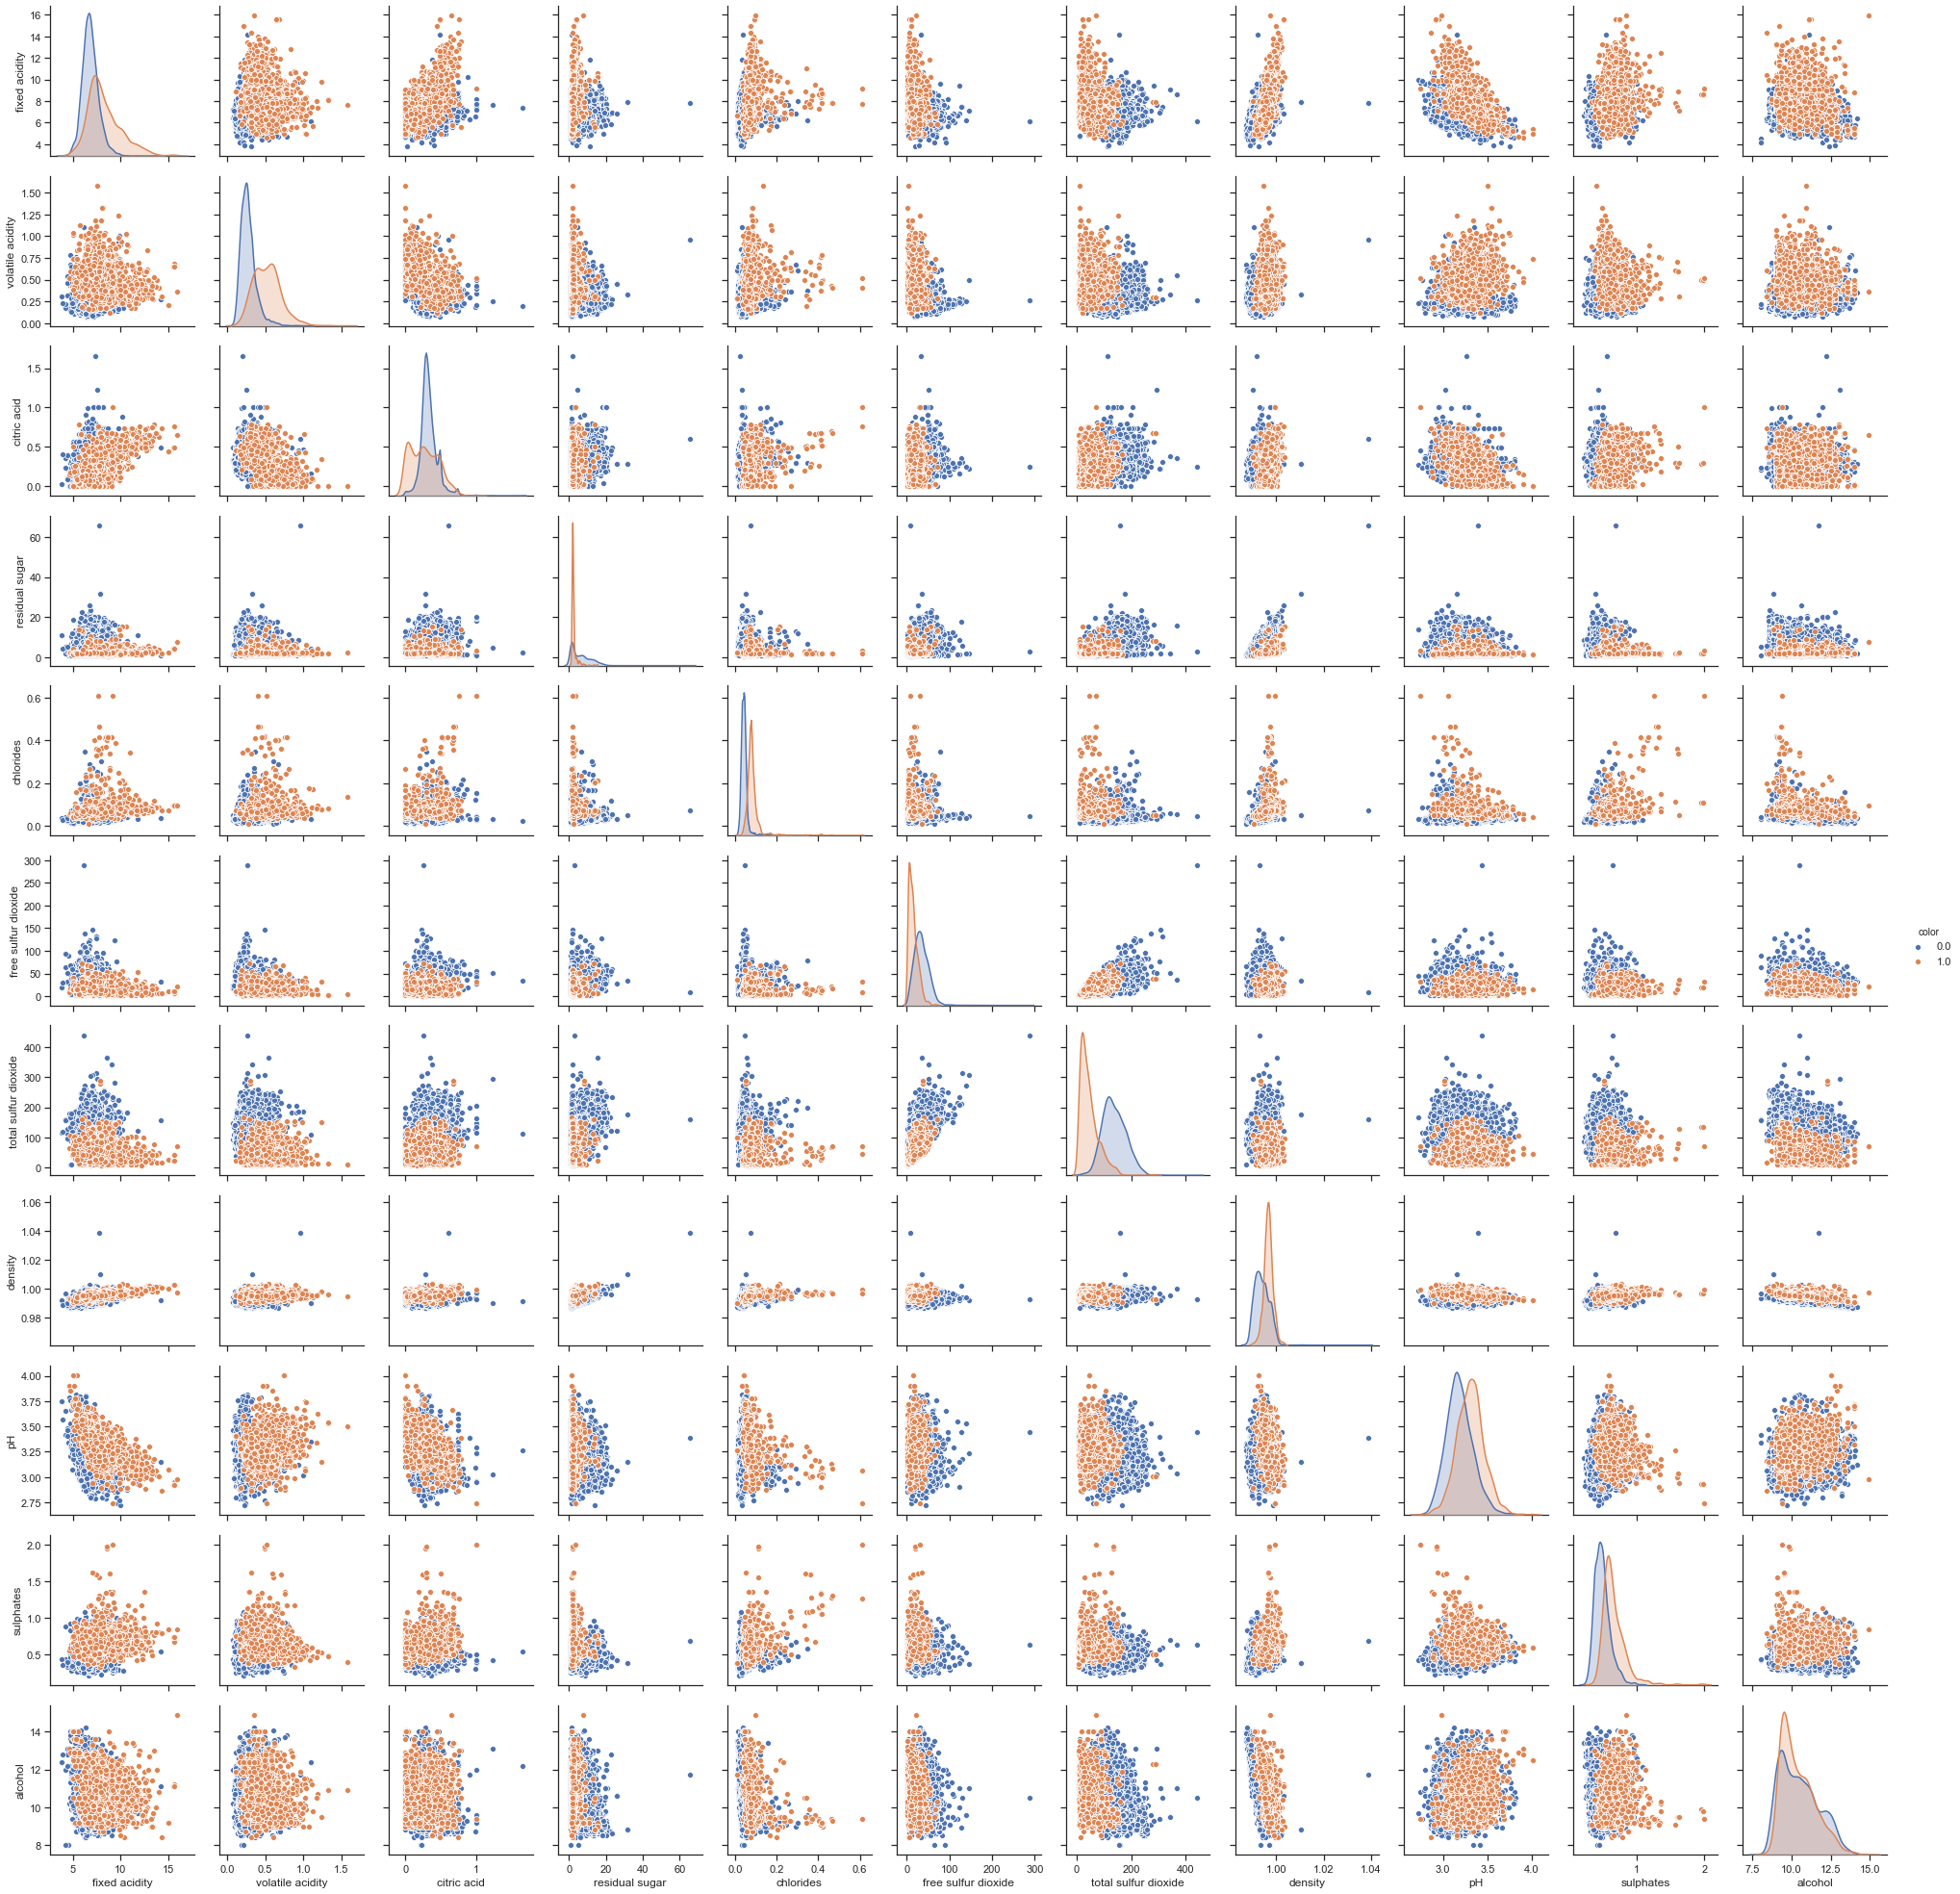

In [7]:
sns.pairplot(wine[DC], vars=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                             "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],
                              hue='color')

### Pairplot of color with normalization

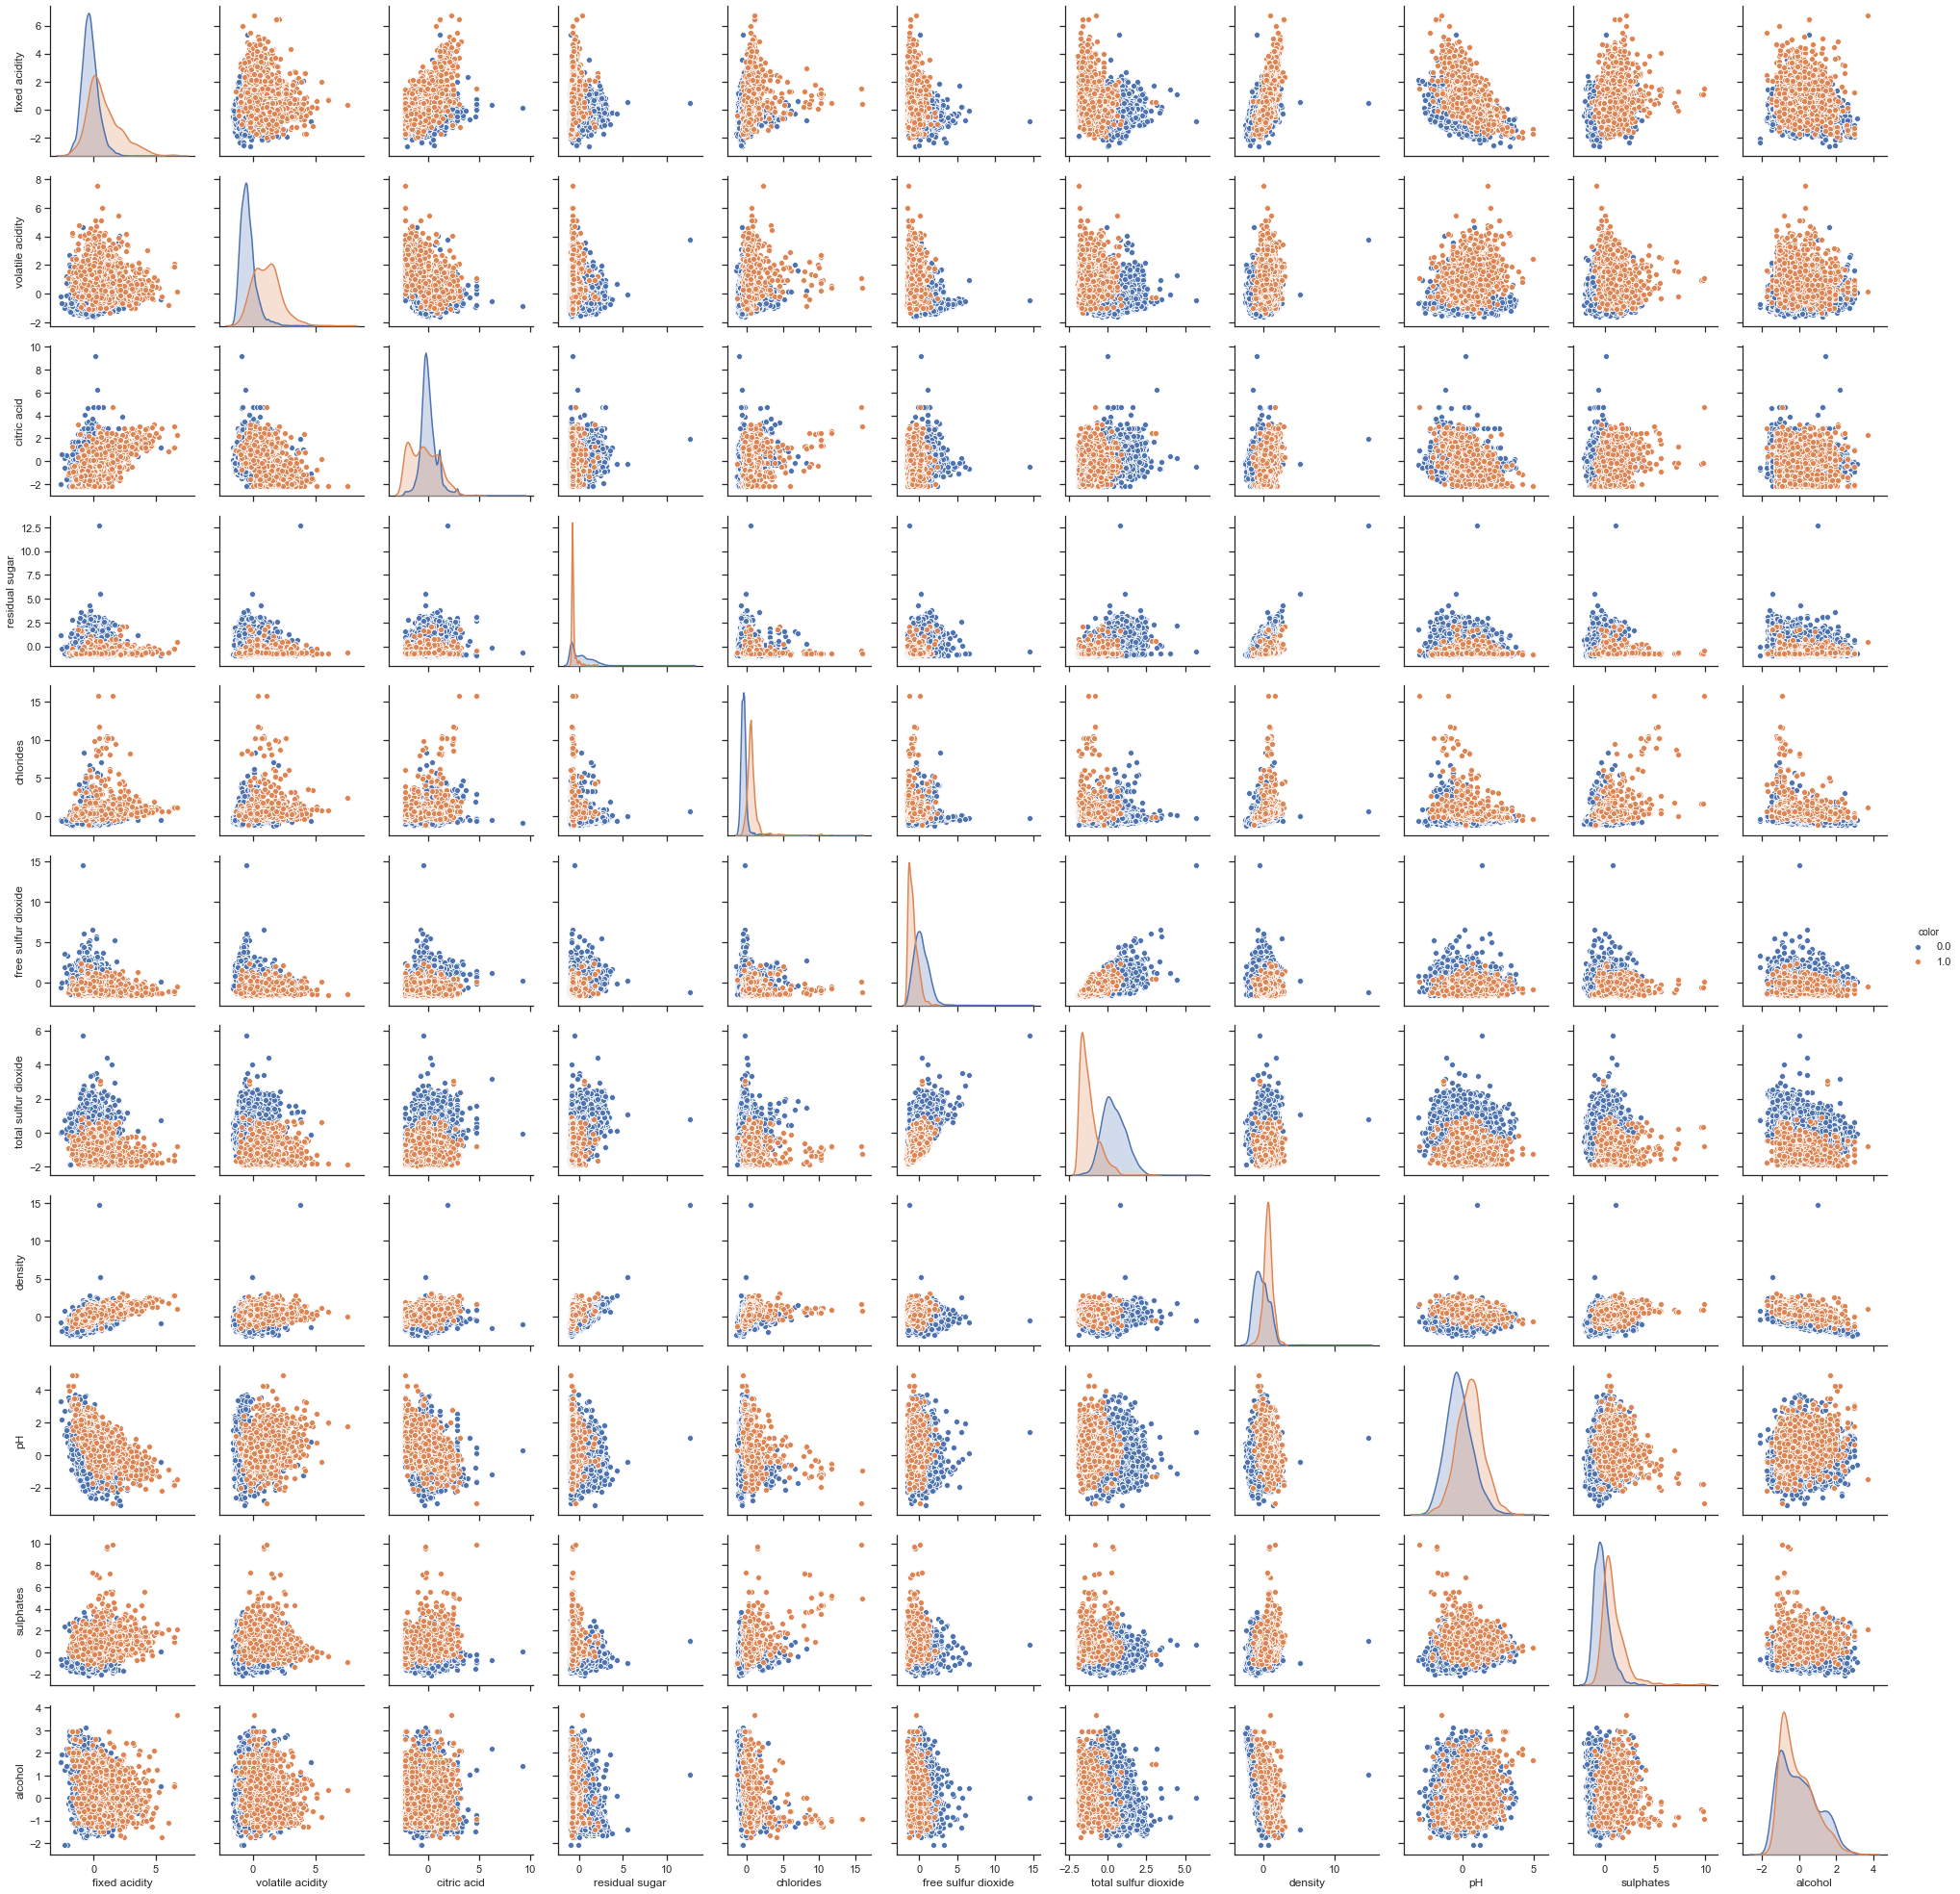

In [8]:
#Normalize dataset
from scipy import stats
from scipy.stats import zscore
norm_wine1= wine[D].apply(zscore)
norm_wine1.insert(11,'color',wine[C])

sns.pairplot(norm_wine1, vars=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                             "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],
                              hue='color')


### Analysis of pair plots before and after Normalization with color label
<br/> Totally there are 11 different features in the wine dataset.The color label has 2 classes. The above are the two pairplots of all the features distinguishing with the color label considering with both with and without normalization. There are 121 plots obtained with each pairplot. The only difference that can be observed for without normalization and with z-score normalization is the change in the scale of x and y axes. Apart from that, the plots are almost similar for both of them. For example, comparing the fixed acidity Vs alcohol plot, without normalization the x-axis(fixed acidity) range from (0,15) and y-axis(alcohol) range from (8,14). Now, the plot with the z-score normalization has x-axis(fixed acidity) range from (0,5) and y-axis(alcohol) range from (-2,4).

### Pairplot of quality without normalization

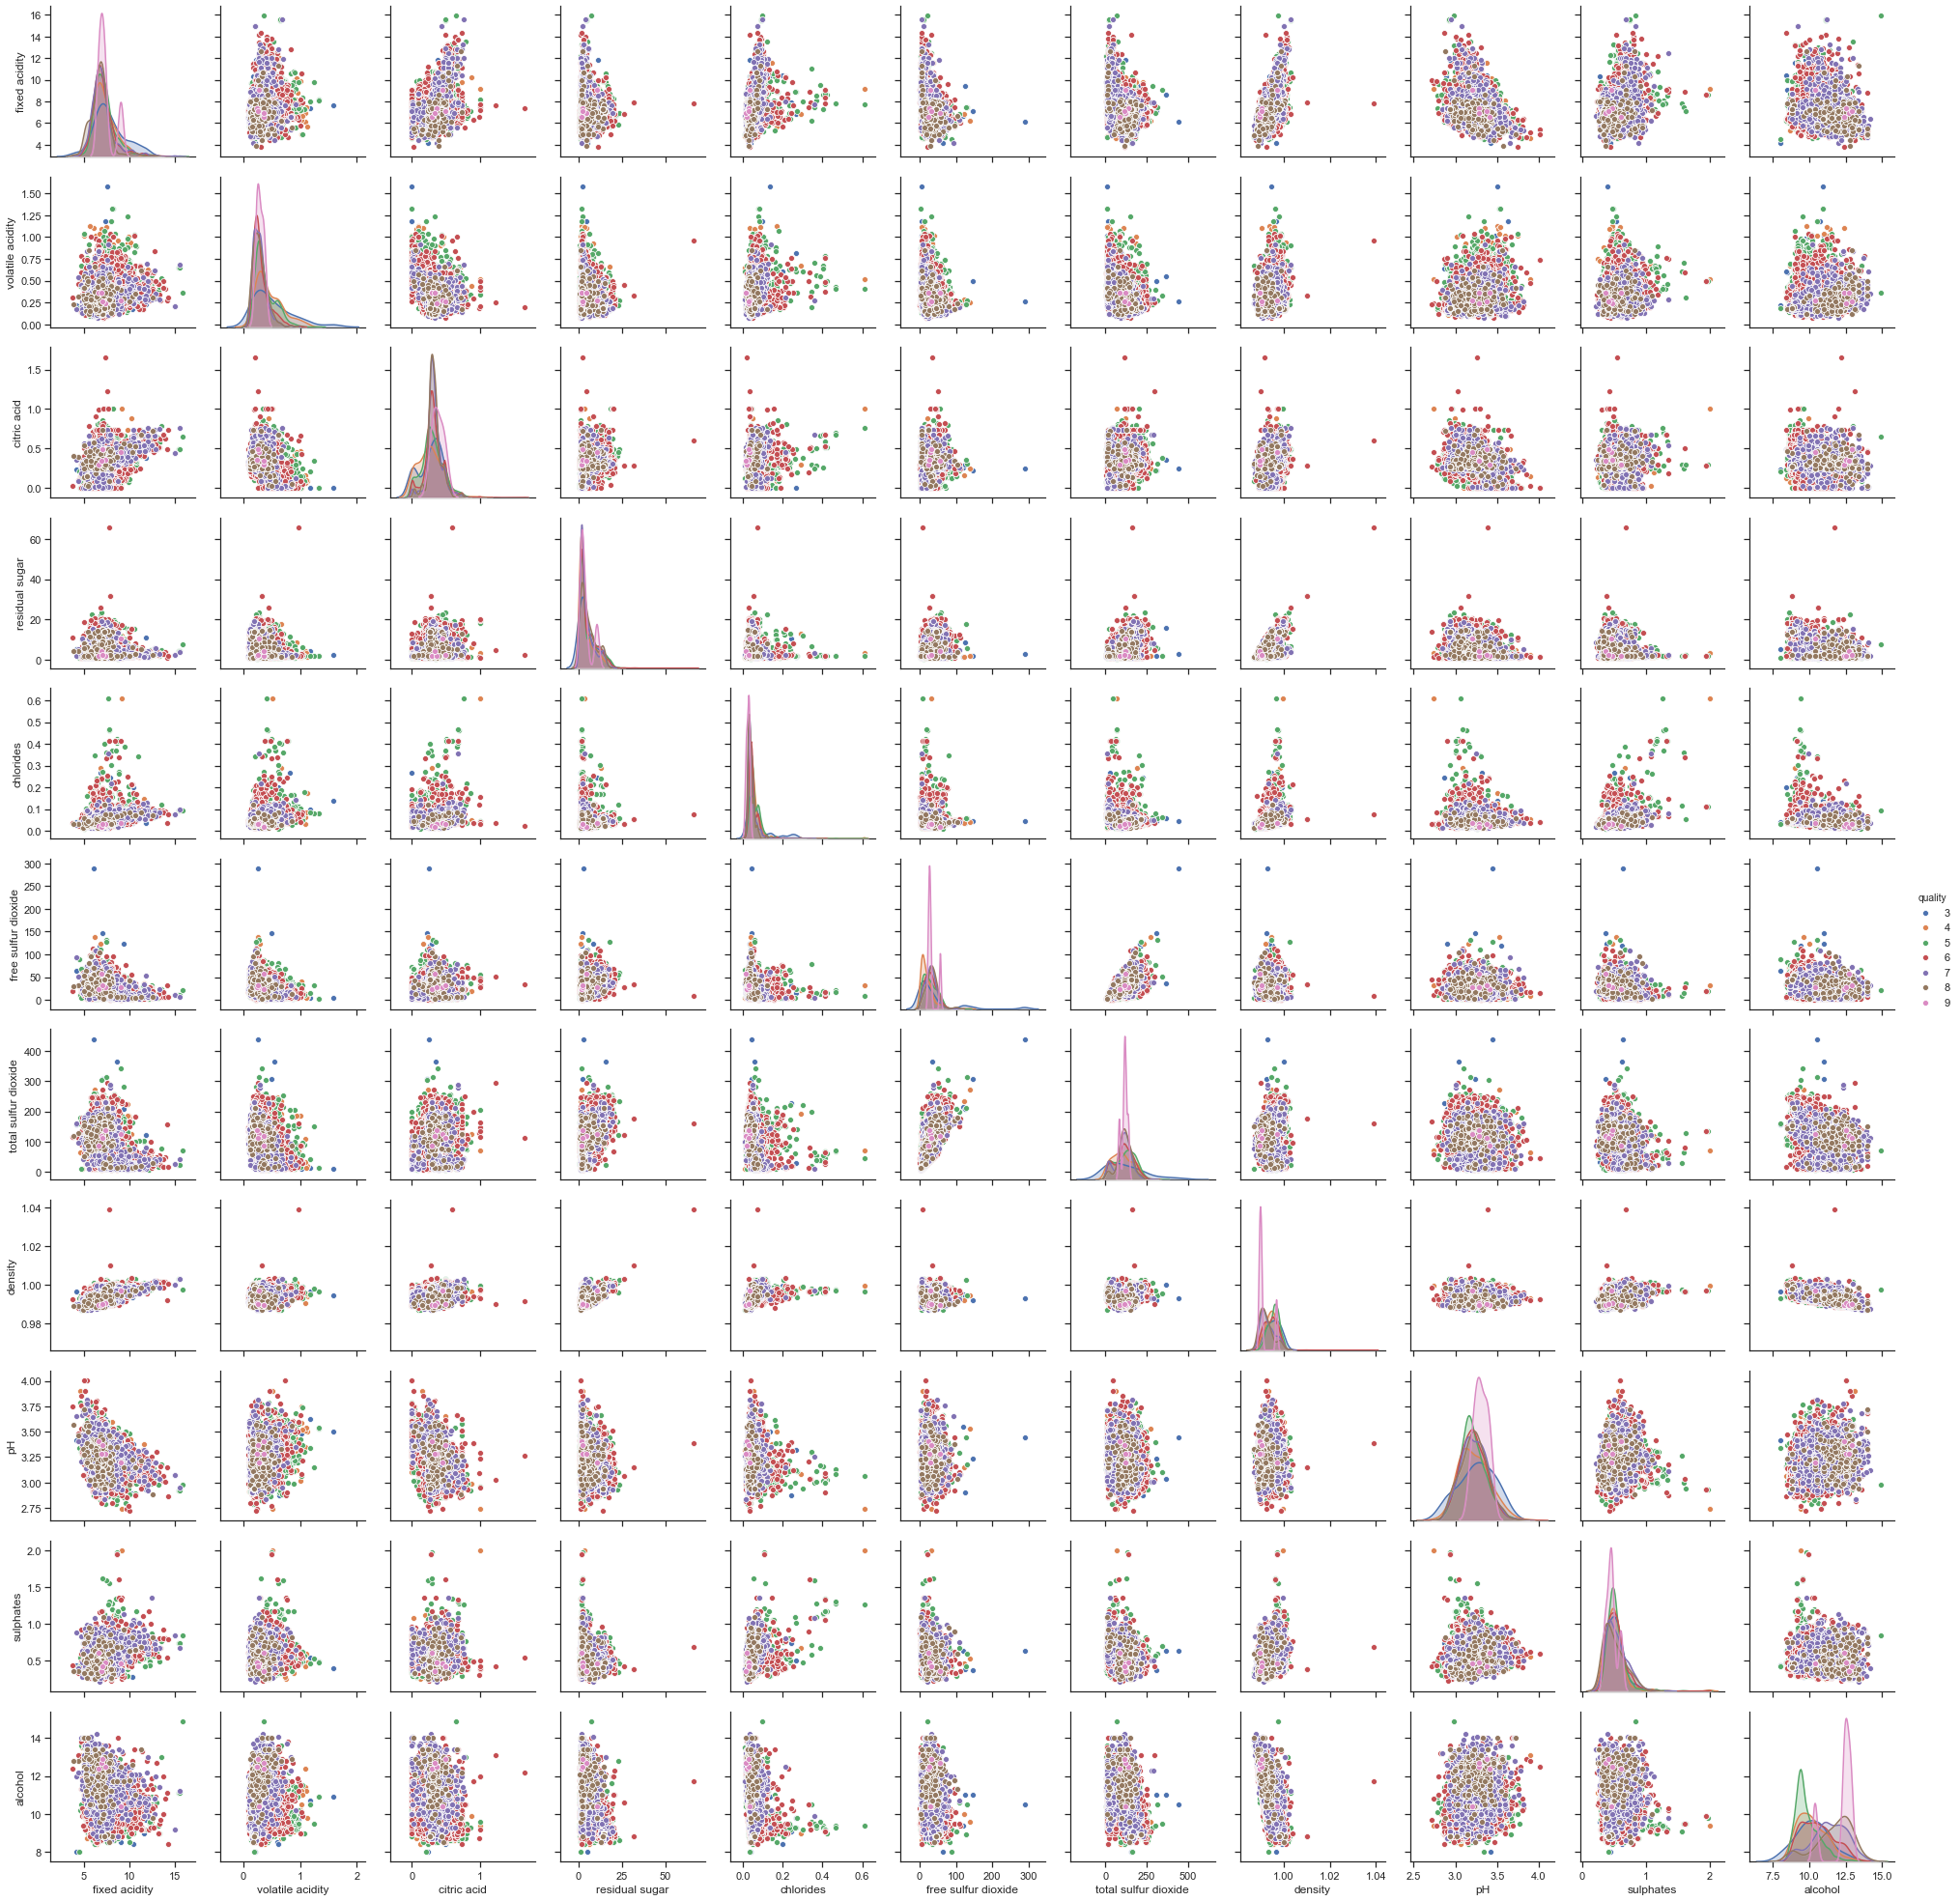

In [9]:
sns.pairplot(wine[DL], vars=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                             "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],
                              hue='quality')

### Pairplot of quality with normalization

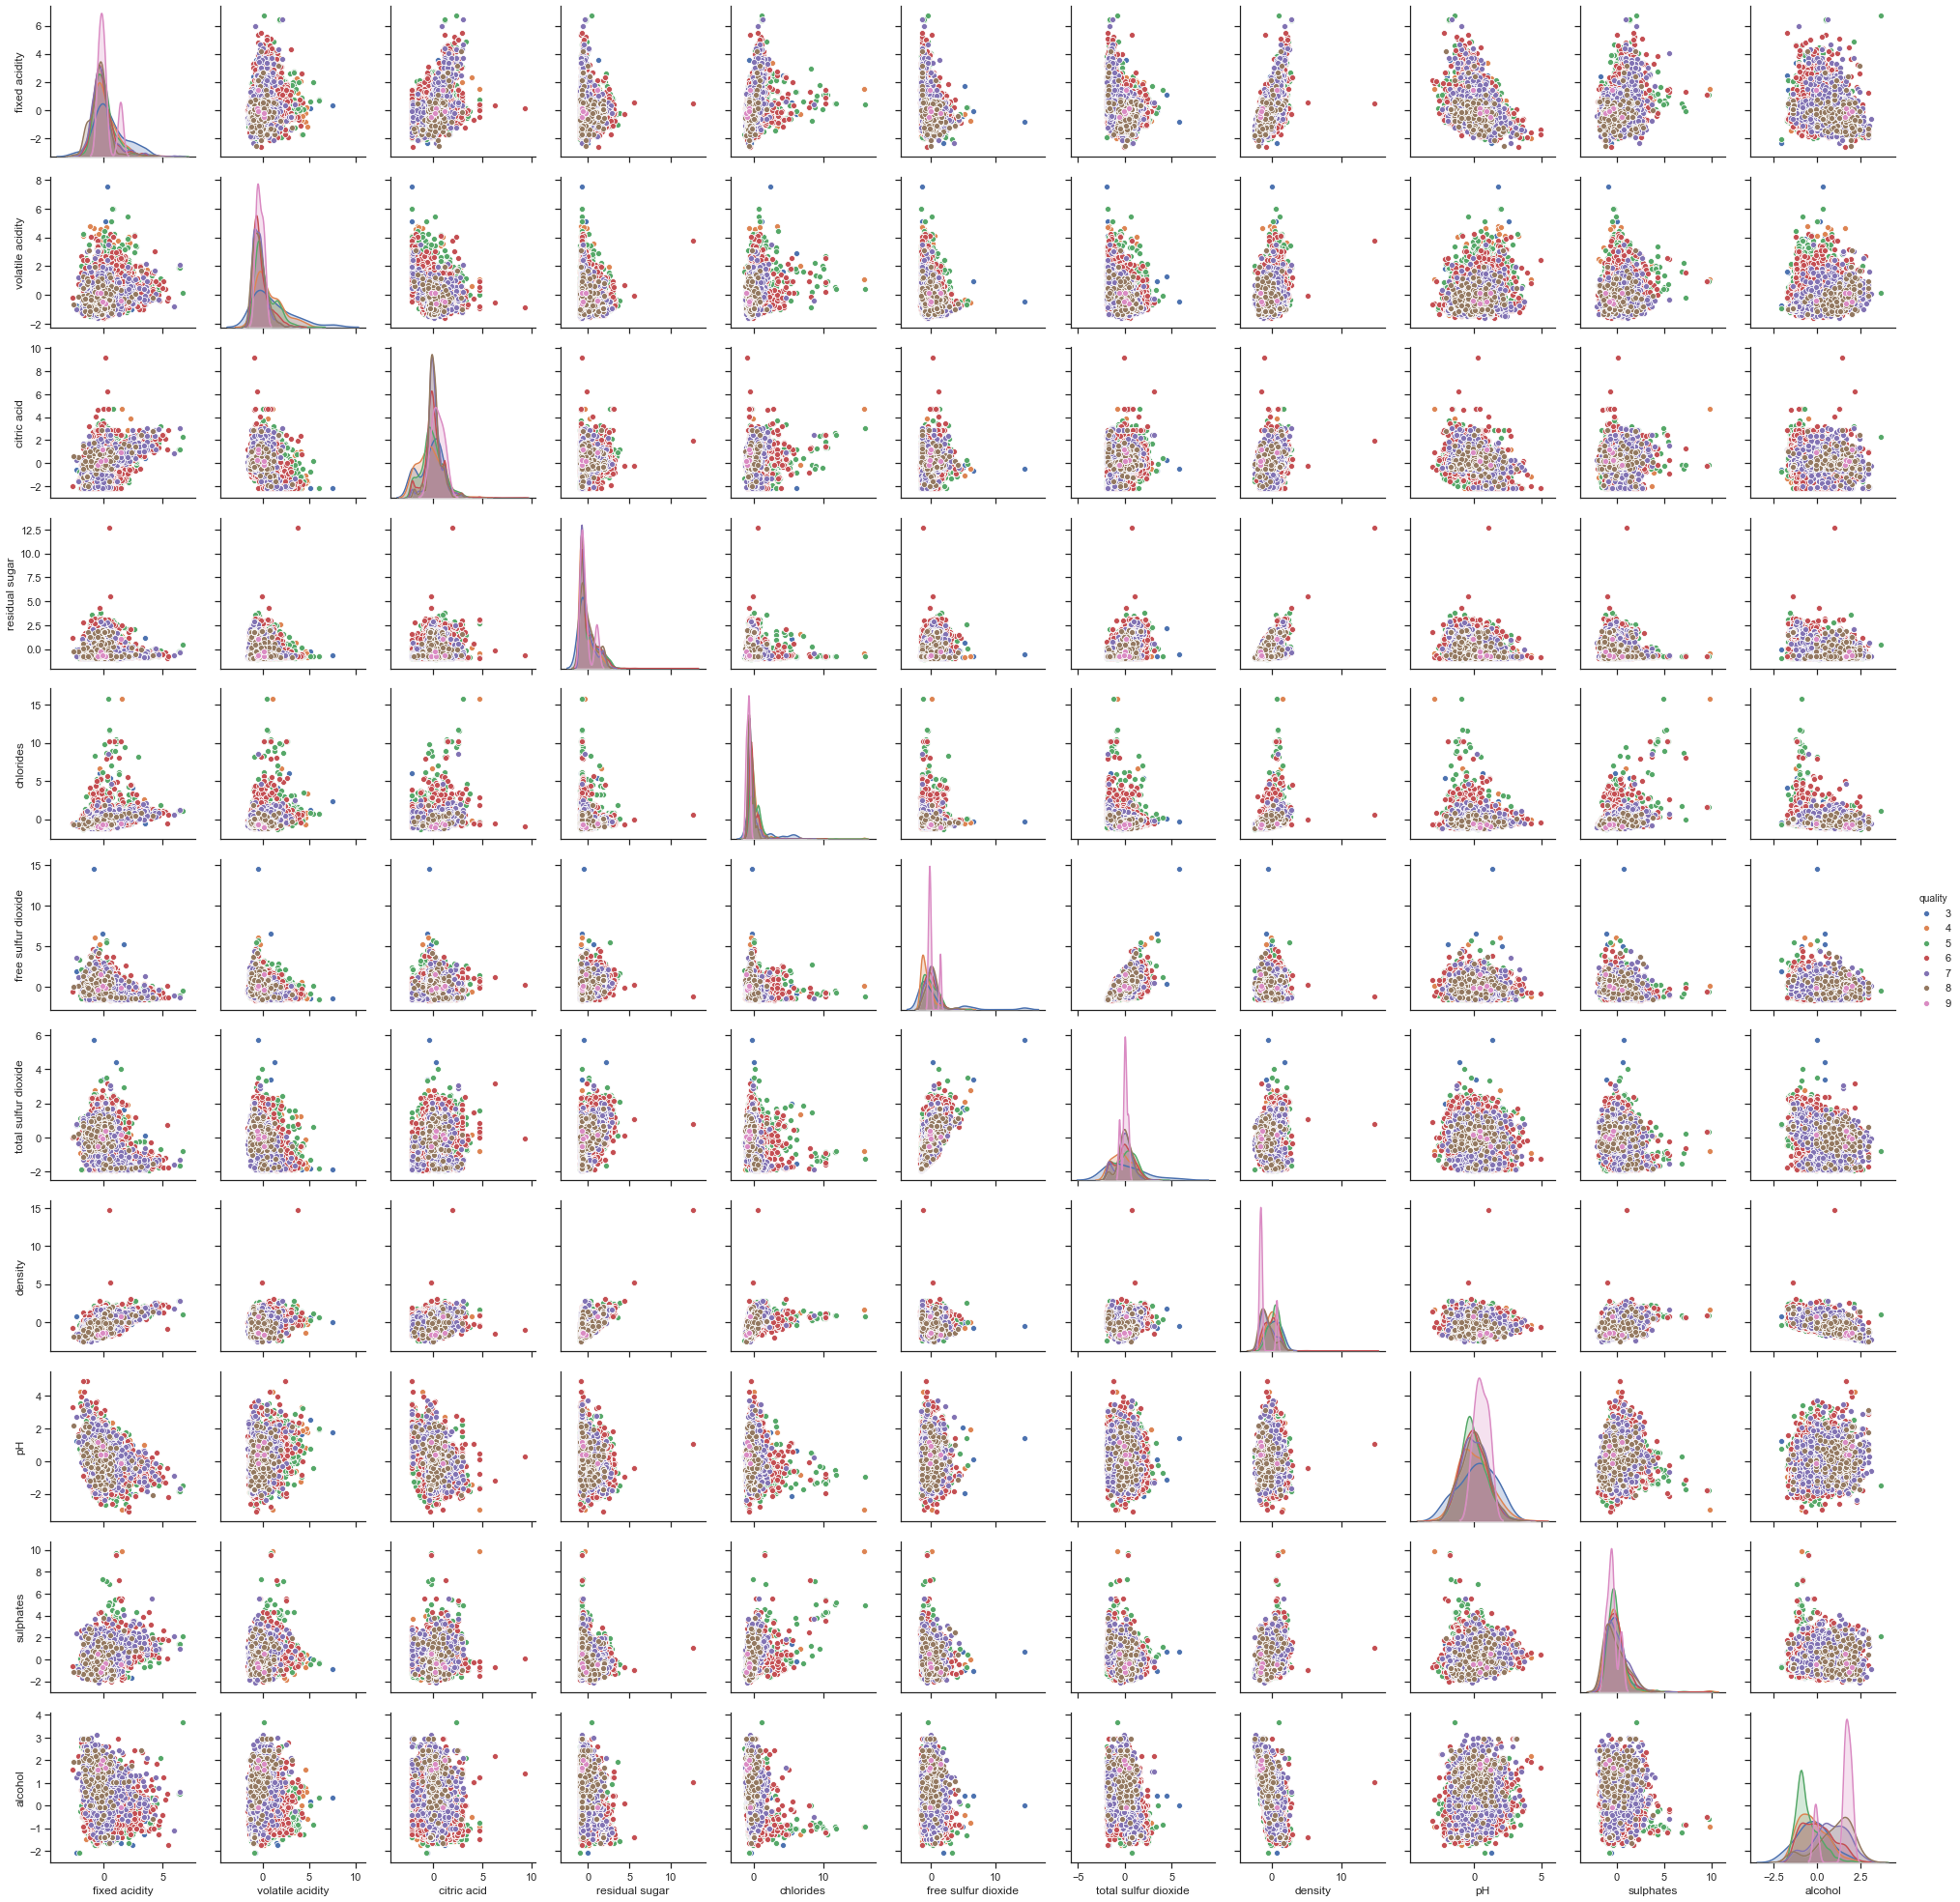

In [10]:
#Normalize dataset
from scipy import stats
from scipy.stats import zscore
norm_wine2= wine[D].apply(zscore)
norm_wine2.insert(11,'quality',wine[L])

sns.pairplot(norm_wine2, vars=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                             "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],
                              hue='quality')

### Analysis of pair plots before and after Normalization with quality label
<br/> I have even compared with using quality as label.There are 11 different features in the wine dataset.The quality has  classes. The above are the two pairplots of all the features distinguishing with the quality label considering with both with and without normalization. There are 121 plots obtained with each pairplot. The only difference that can be observed with quality label is same as that observed in color label i.e., for without normalization and with z-score normalization there is change in the scale of x and y axes. Apart from that, the plots are almost similar for both of them. For example, comparing the fixed acidity Vs alcohol plot, without normalization the x-axis(fixed acidity) range from (0,15) and y-axis(alcohol) range from (8,14). Now, the plot with the z-score normalization has x-axis(fixed acidity) range from (0,5) and y-axis(alcohol) range from (-2,4).

# Classification

### Knn Color with normalization

In [84]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [85]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(X_train_std, y_train)
    y_pred1 = neigh1.predict(X_test_std)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(X_train_std, y_train)
    y_pred2 = neigh2.predict(X_test_std)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(X_train_std, y_train)
    y_pred3 = neigh3.predict(X_test_std)
    accscore3 = accuracy_score(y_test, y_pred3)
    acc.at[k,col_names[2]] = accscore3

acc.describe()
acc.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.993846            0.995385            0.993846
2  0.993846            0.995385            0.993846
3  0.995385            0.995385            0.996154
4  0.994615            0.996154            0.995385

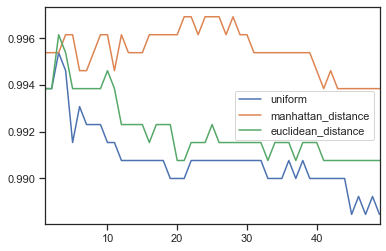

In [86]:
acc[1:].plot.line()

### Knn quality with normalization

In [87]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
train_xn = stdsc.fit_transform(Xq_train)
test_xn = stdsc.transform(Xq_test)

In [88]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
accn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(train_xn, yq_train)
    y_pred1 = neigh1.predict(test_xn)
    accscore1 = accuracy_score(yq_test, y_pred1)
    accn.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(train_xn, yq_train)
    y_pred2 = neigh2.predict(test_xn)
    accscore2 = accuracy_score(yq_test, y_pred2)
    accn.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(train_xn, yq_train)
    y_pred3 = neigh3.predict(test_xn)
    accscore3 = accuracy_score(yq_test, y_pred3)
    accn.at[k,col_names[2]] = accscore3

accn.describe()
accn.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.628462            0.642308            0.628462
2  0.580000            0.642308            0.628462
3  0.564615            0.657692            0.659231
4  0.572308            0.652308            0.657692

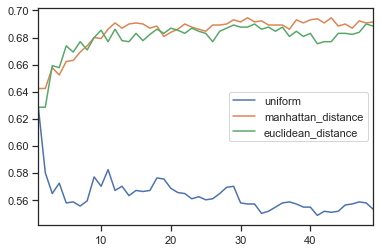

In [89]:
accn[1:].plot.line()

### Knn quality without Normalization

In [99]:
#knn without standardization
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray1 = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
accq=pd.DataFrame(accarray1, columns=col_names)

for k in n_neighborslist:
    neigh11 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh11.fit(Xq_train, yq_train)
    y_pred11 = neigh11.predict(Xq_test)
    accscore11 = accuracy_score(yq_test, y_pred11)
    accq.at[k,col_names[0]] = accscore11
for k in n_neighborslist:
    neigh21 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh21.fit(Xq_train, yq_train)
    y_pred21 = neigh21.predict(Xq_test)
    accscore21 = accuracy_score(yq_test, y_pred21)
    accq.at[k,col_names[1]] = accscore21
for k in n_neighborslist:
    neigh31 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh31.fit(Xq_train, yq_train)
    y_pred31 = neigh31.predict(Xq_test)
    accscore31 = accuracy_score(yq_test, y_pred31)
    accq.at[k,col_names[2]] = accscore31

accq.describe()
accq.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.581538            0.581538            0.581538
2  0.510769            0.581538            0.581538
3  0.493846            0.585385            0.579231
4  0.480000            0.588462            0.580769

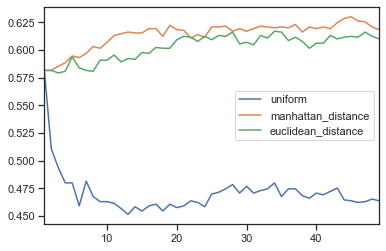

In [100]:
accq[1:].plot.line()

### Knn color without normalization

In [95]:
#knn without standardization
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(X_train, y_train)
    y_pred1 = neigh1.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(X_train, y_train)
    y_pred2 = neigh2.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(X_train, y_train)
    y_pred3 = neigh3.predict(X_test)
    accscore3 = accuracy_score(y_test, y_pred3)
    acc.at[k,col_names[2]] = accscore3

acc.describe()
acc.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.950000            0.961538            0.950000
2  0.939231            0.961538            0.950000
3  0.935385            0.960000            0.949231
4  0.935385            0.960769            0.951538

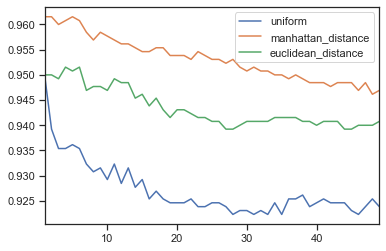

In [96]:
acc[1:].plot.line()

# Feature Extraction

### PCA quality with normalization

In [19]:
# classify quality of wine with all features
X = wine[D].values
yq = np.ravel(wine[[L]])


X_train, X_test, yq_train, yq_test = train_test_split(X, yq, test_size=0.2, random_state = 42) 

In [20]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [21]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=5, random_state = 42)
pca_x_train = sklearn_pca.fit_transform(X_train_std)
pca_x_test = sklearn_pca.fit_transform(X_test_std)

In [22]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc1qn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(pca_x_train, yq_train)
    y_pred1 = neigh1.predict(pca_x_test)
    accscore1 = accuracy_score(yq_test, y_pred1)
    acc1qn.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(pca_x_train, yq_train)
    y_pred2 = neigh2.predict(pca_x_test)
    accscore2 = accuracy_score(yq_test, y_pred2)
    acc1qn.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(pca_x_train, yq_train)
    y_pred3 = neigh3.predict(pca_x_test)
    accscore3 = accuracy_score(yq_test, y_pred3)
    acc1qn.at[k,col_names[2]] = accscore3

acc1qn.describe()
acc1qn.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.374615            0.381538            0.374615
2  0.388462            0.381538            0.374615
3  0.382308            0.396923            0.396154
4  0.390769            0.409231            0.403077

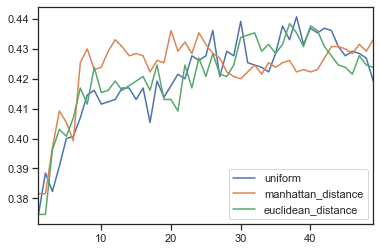

In [23]:
acc1qn[1:].plot.line()

### LDA Quality with Normalization

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=5)
lda_train_x = sklearn_lda.fit_transform(X_train_std, yq_train)
lda_test_x = sklearn_lda.fit_transform(X_test_std, yq_test)

In [25]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc2qn=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(lda_train_x, yq_train)
    y_pred1 = neigh1.predict(lda_test_x)
    accscore1 = accuracy_score(yq_test, y_pred1)
    acc2qn.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(lda_train_x, yq_train)
    y_pred2 = neigh2.predict(lda_test_x)
    accscore2 = accuracy_score(yq_test, y_pred2)
    acc2qn.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(lda_train_x, yq_train)
    y_pred3 = neigh3.predict(lda_test_x)
    accscore3 = accuracy_score(yq_test, y_pred3)
    acc2qn.at[k,col_names[2]] = accscore3

acc2qn.describe()
acc2qn.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.439231            0.430769            0.439231
2  0.446154            0.430769            0.439231
3  0.436154            0.443077            0.446154
4  0.475385            0.461538            0.458462

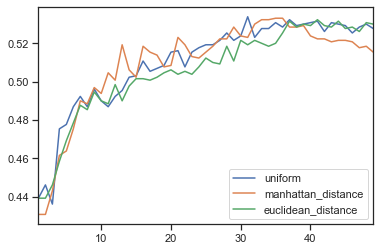

In [26]:
acc2qn[1:].plot.line()

### Performance differences between PCA quality and LDA quality with normalization
<br/>Principal Component Analysis (PCA) is an unsupervised learning algorithm as it ignores the class labels (the so-called principal components) that maximize the variance in a dataset, to find the directions. In other words, PCA is basically summarization of data.Linear Discriminant Analysis is a supervised algorithm as it takes the class label into consideration. It is a way to reduce ‘dimensionality’ while at the same time preserving as much of the class discrimination information as possible.
<br/>Considering the PCA quality plot,
<ol>
    <li>For uniform distance, the accuracy started with 37% and kept increased with the increase in the k-value. There is an increase but there are also many fluctuations in the middle. If we observe in the graph, the highest was obtained at around k=38 with an accuracy of 44%. But again it got decreased around 2%.</li>
    <li>For Manhattan distance, the performance is well till k=23, later it started decreasing but finally was there at accuracy 43% for k=50. Until the k value 23, the performance with Manhattan is pretty good than uniform and Euclidean with accuracy nearly to 44%.</li>
    <li>For Euclidean distance, its performance was always moderate compared to uniform and Manhattan.</li>
</ol>
<br/>Now considering the LDA quality plot,
<ol>
    <li>For uniform distance, the accuracy started with 44% itself and had a gradual increase with more number of ups and downs but only with less difference level. The highest accuracy for uniform was achieved at k=30 with more than 53%. Finally, for k=50, it settled down to an accuracy of 52%.</li>
    <li>For Manhattan distance, it started with around 42% and kept on increased, also at certain points, its accuracy is more than remaining two. Later for k=50, it ended with 51% accuracy which is least compared to other two.</li>
    <li>For Euclidean distance, it maintained an accuracy which is almost equal to the *uniform*. From the plot, it can be seen that with range of k=12 to k=37, its accuracy was less than of uniform and Manhattan. But finally, it settled down with an accuracy equal to that of uniform.</li>  
</ol>
<br/> Difference between the performances in PCA and LDA using weighing schemes:
<ol>
    Note that, PCA does not select a set of features and discard other features, but it infers some new features, which best describe the type of class from the existing features whereas LDA takes class label into consideration.If we observe from the plots, the accuracy is very less for PCA with highest of 44%(for uniform) compared to LDA which has highest as nearly 54%(for uniform) accuracy.Here the LDA performance is better compared to PCA because, PCA works better only in the case where number of samples per class is less whereas LDA works better with large dataset having multiple classes ,as we want the reduction in dimensionality, the class seperability is an important factor.

### PCA quality without normalization

In [27]:
#PCA Quality without normalization
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=5, random_state = 42)
pca_x_trainqn = sklearn_pca.fit_transform(X_train)
pca_x_testnq = sklearn_pca.fit_transform(X_test)

In [28]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc1q=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(pca_x_trainqn, yq_train)
    y_pred1 = neigh1.predict(pca_x_testnq)
    accscore1 = accuracy_score(yq_test, y_pred1)
    acc1q.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(pca_x_trainqn, yq_train)
    y_pred2 = neigh2.predict(pca_x_testnq)
    accscore2 = accuracy_score(yq_test, y_pred2)
    acc1q.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(pca_x_trainqn, yq_train)
    y_pred3 = neigh3.predict(pca_x_testnq)
    accscore3 = accuracy_score(yq_test, y_pred3)
    acc1q.at[k,col_names[2]] = accscore3

acc1q.describe()
acc1q.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.571538            0.573846            0.571538
2  0.514615            0.573846            0.571538
3  0.494615            0.586923            0.580769
4  0.482308            0.576154            0.578462

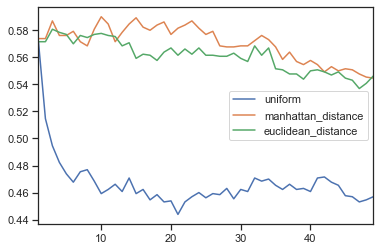

In [29]:
acc1q[1:].plot.line()

### LDA quality without normalization

In [30]:
#LDA Quality without Normalization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=5)
lda_train_xunnorm = sklearn_lda.fit_transform(X_train, yq_train)
lda_test_xunnorm = sklearn_lda.fit_transform(X_test, yq_test)

In [31]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan_distance','euclidean_distance']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc2q=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh1.fit(lda_train_xunnorm, yq_train)
    y_pred1 = neigh1.predict(lda_test_xunnorm)
    accscore1 = accuracy_score(yq_test, y_pred1)
    acc2q.at[k,col_names[0]] = accscore1
for k in n_neighborslist:
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights ='distance',p=1)
    neigh2.fit(lda_train_xunnorm, yq_train)
    y_pred2 = neigh2.predict(lda_test_xunnorm)
    accscore2 = accuracy_score(yq_test, y_pred2)
    acc2q.at[k,col_names[1]] = accscore2
for k in n_neighborslist:
    neigh3 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh3.fit(lda_train_xunnorm, yq_train)
    y_pred3 = neigh3.predict(lda_test_xunnorm)
    accscore3 = accuracy_score(yq_test, y_pred3)
    acc2q.at[k,col_names[2]] = accscore3

acc2q.describe()
acc2q.head()

uniform  manhattan_distance  euclidean_distance
0  0.000000            0.000000            0.000000
1  0.439231            0.430769            0.439231
2  0.446154            0.430769            0.439231
3  0.436154            0.443077            0.446154
4  0.475385            0.461538            0.458462

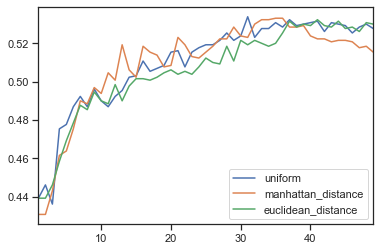

In [32]:
acc2q[1:].plot.line()

# Analysis and Discussion

## 1. k plots

Please go through the plots which are already in the above Classification and Feature Extraction section.

## 2. Features

<br/> There are different features that have correlation with each other. This correlation can be obtained by using models.

## 3. PCA vs. LDA

<br/>Compared to PCA and LDA, LDA has the better accuracy with highest of around 54% than PCA which has accuracy of 44% when change with the k values from $[1,50].$ So, LDA worked better for the task in this particular situation, because LDA works better for the Large dataset having multiple classes.
<br/>Impact of Normalization:
<ol>
    <li>For LDA with taking quality as label, comparing the plots in the Feature Extraction section tells that, the plot without normalization and with normalization are giving the same accuracy with the change in values of k from $[1,50].$ This tells that, there is no impact of Normalization on LDA.</li>
    <li>For PCA with taking quality as label,consider the plots in the Feature Extraction section with and without normalization.Without normalization, the accuracy is high at starting but as the value of k increases, it started decreasing. The uniform distance performance was even worse in this case(which has large change in the starting and ending accuracy values). With normalization, the accuracy is not as high as compared with the without normalization. But even as the k value increases, it maintained a uniformity in the plots without any large fluctuation in the values and had a gradual increase in the accuracy. Thus, there is an impact of Normalization on PCA.</li>

## 4.

### Projection of data on the first two components for PCA

In [33]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2,random_state =42) 
pca.fit(X_std) 
x_pca = pca.transform(X_std) 
  
print(x_pca)

[[ 2.77861838  3.04233034]
 [-0.12979316 -0.49168276]
 [ 0.19473808  0.37875436]
 ...
 [-2.27481048 -0.42371133]
 [-2.47956601 -0.39277893]
 [-1.25870118 -0.38337326]]


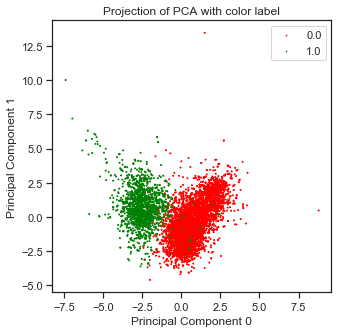

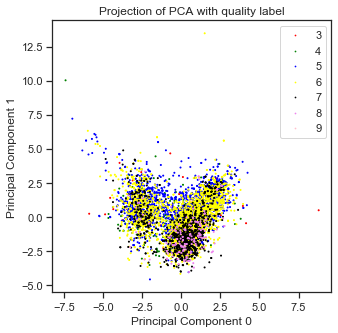

In [35]:
# giving a larger plot 
#%matplotlib inline

plt.figure(figsize =(5, 5)) 
#k = 1

for l,c in zip((np.unique(y)),['red','green']):
    plt.scatter(x_pca[:, 0],x_pca[:, 1],y==l,c=c,label=l)
    plt.xlabel('Principal Component 0')
    plt.ylabel('Principal Component 1')
            #k = k+1
plt.title('Projection of PCA with color label')
plt.legend()

# giving a larger plot 
#%matplotlib inline

plt.figure(figsize =(5, 5)) 
#k = 1

for l,c in zip((np.unique(yq)),['red','green','blue','yellow','black','violet','pink']):
    plt.scatter(x_pca[:, 0],x_pca[:, 1],yq==l,c=c,label=l)
    plt.xlabel('Principal Component 0')
    plt.ylabel('Principal Component 1')
            #k = k+1
plt.title('Projection of PCA with quality label')
plt.legend()
plt.show()

<br/>If we observe the plot obtained from the projection of PCA with color label, the two classes of color label are distinguished perfectly, almost without any overlap in the classes. Now, considering the pairplots of all the features, the plot of *total sulphur dioxide vs. pH* also does the same thing. Even this plot seperates the classes of color label without any overlap.
<br/>Now, considering the plot obtained from the projection of PCA with quality label, the classes of quality label are overlapped which is very difficult to distinguish the classes. We can't compare or analyze this plot with any of the pairplots.

### Projection of data on the first two components for LDA

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda = sklearn_lda.fit_transform(X_std, yq)

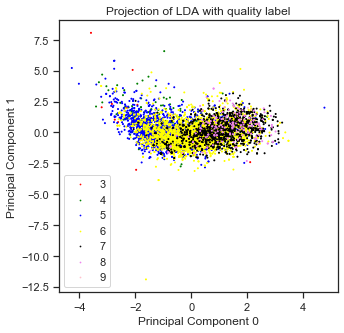

In [37]:
# giving a larger plot 
#%matplotlib inline

plt.figure(figsize =(5, 5)) 
#k = 1

for l,c in zip((np.unique(yq)),['red','green','blue','yellow','black','violet','pink']):
    plt.scatter(X_lda[:, 0],X_lda[:, 1],yq==l,c=c,label=l)
    plt.xlabel('Principal Component 0')
    plt.ylabel('Principal Component 1')
            #k = k+1
plt.title('Projection of LDA with quality label')
plt.legend()
plt.show()

<br/>The plot obtained by the projection of LDA with quality label also shows all the classes in the quality label are overlapped with each other. Hence, it's difficult to compare or analyze with any of the pairplots. 

### References:
<br/>
<ol>
    <br/>Normalization
    <li>https://www.programcreek.com/python/example/100340/scipy.stats.zscore</li>
    <li>https://stackoverflow.com/questions/50194821/why-normalization-using-z-score-in-pandas-dataframe-generates-nan-columns</li>
    <li>https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html</li>
    <li>https://stackoverflow.com/questions/24761998/pandas-compute-z-score-for-all-columns</li>
    <li>https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842/2</li>
    <br/>KNN
    <li>https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn</li>
    <li>https://scipy-lectures.org/packages/scikit-learn/index.html</li>
    <li>https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-II-Datasets-Partitioning-Feature-scaling-Feature-Selection-Regularization.php</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</li>
    <br/>PCA
    <li>https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html</li>
    <li>https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/</li>
    <li>https://stats.stackexchange.com/questions/55718/pca-and-the-train-test-split</li>
    <br/>LDA
    <li>https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html</li>
    <li>https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt</li>
    <li>https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html</li>
    <li>https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/</li>
    <li>https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/</li>
    <li>https://stackoverflow.com/questions/11886862/calculating-computational-time-and-memory-for-a-code-in-python/40052989</li>
</ol>

# Linear Dimensionality Reduction
## Principal Component Analysis

### Computing the Eigen Vectors and Eigen Values. Plot the scree plot and Visually discuss which cut-off is good

In [38]:
#Importing the libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import diag
from numpy import dot
from numpy import zeros

In [39]:
data = pd.read_csv("C:/Users/Samhithachowdary/.ipynb_checkpoints/DataB.csv")
X = data.iloc[:, 1:785 ].values
Y = data.iloc[:, 785].values
print(X.shape)
print(Y)
print(data.shape)

(2066, 784)
[0 0 0 ... 4 4 4]
(2066, 786)


In [40]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [41]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00048426e+00 -2.02536284e-02  2.80261755e-02 ...  6.12273392e-04
   1.32442087e-02  3.17637187e-02]
 [-2.02536284e-02  1.00048426e+00  2.16756551e-02 ... -9.75510851e-03
   3.61411028e-02 -1.80895701e-02]
 [ 2.80261755e-02  2.16756551e-02  1.00048426e+00 ...  6.04555535e-03
  -2.77143879e-02  3.10482051e-02]
 ...
 [ 6.12273392e-04 -9.75510851e-03  6.04555535e-03 ...  1.00048426e+00
  -1.11265240e-02 -9.86731912e-03]
 [ 1.32442087e-02  3.61411028e-02 -2.77143879e-02 ... -1.11265240e-02
   1.00048426e+00  1.44399871e-02]
 [ 3.17637187e-02 -1.80895701e-02  3.10482051e-02 ... -9.86731912e-03
   1.44399871e-02  1.00048426e+00]]


In [42]:
cov_mat1 = np.cov(X_std.T)
print(cov_mat1)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)


[[ 1.00048426e+00 -2.02536284e-02  2.80261755e-02 ...  6.12273392e-04
   1.32442087e-02  3.17637187e-02]
 [-2.02536284e-02  1.00048426e+00  2.16756551e-02 ... -9.75510851e-03
   3.61411028e-02 -1.80895701e-02]
 [ 2.80261755e-02  2.16756551e-02  1.00048426e+00 ...  6.04555535e-03
  -2.77143879e-02  3.10482051e-02]
 ...
 [ 6.12273392e-04 -9.75510851e-03  6.04555535e-03 ...  1.00048426e+00
  -1.11265240e-02 -9.86731912e-03]
 [ 1.32442087e-02  3.61411028e-02 -2.77143879e-02 ... -1.11265240e-02
   1.00048426e+00  1.44399871e-02]
 [ 3.17637187e-02 -1.80895701e-02  3.10482051e-02 ... -9.86731912e-03
   1.44399871e-02  1.00048426e+00]]


In [43]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
51.77731941746013
28.80086463269744
26.77091054238158
23.930346170893795
21.575039387693053
15.893525107192138
13.861941284169301
11.91208875726605
10.661418324001989
9.823582846461333
9.113336206689983
8.287958420226882
7.470220782044187
7.1868568890837015
7.018217325119066
6.729238999123724
6.171713613386484
6.03035493640628
5.972188193218801
5.745885095337571
5.566419794128186
5.340855255883897
5.309997481395432
5.072444632521782
4.902199961706236
4.740327644222625
4.460409539559407
4.438758342754274
4.375229735505764
4.2499149317407205
4.197361440595762
4.13191195478748
4.0066837048060675
3.899598383098658
3.821037470088159
3.7580177316880614
3.700872216762684
3.572426947171868
3.538707284745635
3.4760928801601816
3.3786019665202573
3.277138102986414
3.196151206615583
3.1876207959776917
3.0998264466742405
3.006451312757764
2.9566833775729777
2.93613237607325
2.846674178454309
2.804904399644861
2.777524320052255
2.7356623701411085
2.7306211773516575


Text(0, 0.5, 'Eigenvalue')

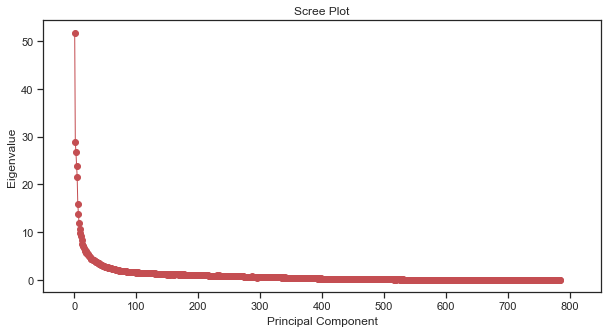

In [44]:
#scree plot
plt.figure(figsize=(10,5))
components = np.arange(start=0,stop=len(eig_vals),step=1) + 1
plt.xlim(-50,850)
plt.plot(components, eig_vals, 'ro-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

<br/>The scree plot technique involves drawing a straight line through the plotted eigenvalues, starting with the
largest one. The last point to fall on this line represents the last factor that you extract, with the idea being
that beyond this, the amount of additional variance explained is non-meaningful. In fact, the word “scree”
refers to the loose stone that lies around the base of the mountain. A “scree plot” is effectively looking to
help you differentiate between the points that represent “mountain”, and the points that represent “scree.” 
<br/>Here we have taken the scree plot with Number of Principal Components vs. Eigen Values.
<br/><li>*If we compare the 1st Eigen value for the first principal component to the very next Eigen value of the second principal component, there is a sudden fall from 51.7 to 28.8. Visually, (PC 1-PC 2) seems to be the good cut-off.*</li>
<br/><li>*Later again, if we see the 5th principal component and the 6th principal component, there is also a comparable cut-off from 21.5 to 15.8. Thus, (PC 4-PC 5) can also be taken as good cut-off. On the whole, we can observe that there is drop in the curve. So overall Principal Component 1 - Principal Component 5 gives the good cut-off visually.*</li>

### Using subplot in python matplotlib, plotting the scatter plot of the projected data with the top 20 eigenvalues 

In [45]:
from sklearn.decomposition import PCA
pca = PCA(random_state =42) 
pca.fit(X_std) 
x_pca = pca.transform(X_std) 
  
print(x_pca)

[[ 9.97069222e+00 -6.18172201e+00 -4.99286326e+00 ...  2.84664097e-02
  -6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01 -6.94158705e+00 -5.06302886e+00 ...  2.28147473e-01
  -4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00 -4.69309729e+00 -2.90865640e+00 ... -1.15182625e-01
   5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01 -9.33681056e-01  8.10744188e+00 ...  6.93521885e-02
   8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00 -2.09047425e+00  6.27251911e+00 ... -1.26995790e-01
  -1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00  2.46166632e-01  4.14018317e+00 ... -1.57632818e-02
   1.77113186e-02 -1.11643749e-02]]


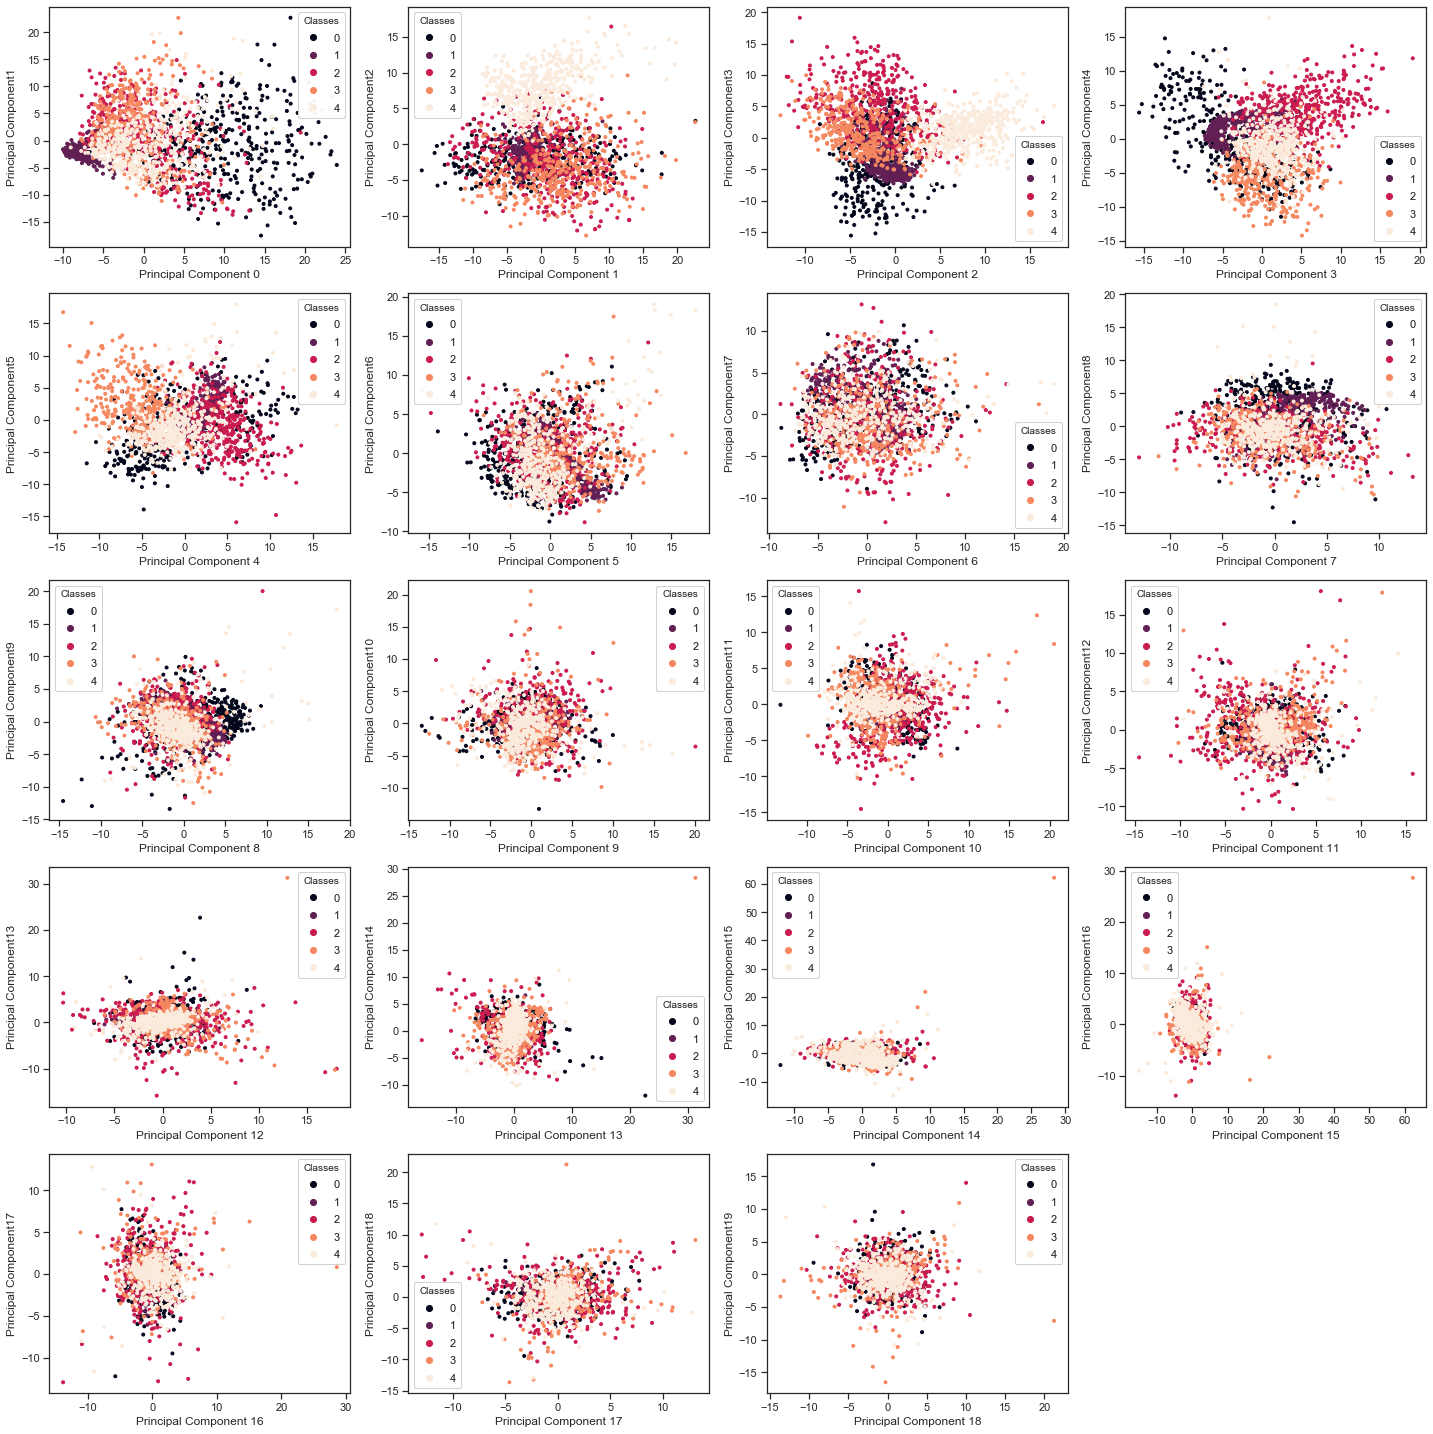

In [46]:
# giving a larger plot 
#%matplotlib inline

plt.figure(figsize =(20, 20)) 
#k = 1
for i in range(0,19):
    j=i+1
    ax = plt.subplot(5,4,i+1)
    #l = np.unique(Y)
    scatter = plt.scatter(x_pca[:, i],x_pca[:, j], marker = '.', c=Y)
    plt.xlabel('Principal Component {}'.format(i))
    plt.ylabel('Principal Component{}'.format(j))
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
            #k = k+1

plt.tight_layout(pad = 1.0)
plt.show()

<br/>
<li>Considering the 1st plot from above, applying PCA model, there is overlap between the classes and all the data is scattered.</li>
<li>Later, as the number of Principal components increases, there is a decrease in the variance in the scatter plots</li>
<li>Generally, PCA has large variance.</li>

### Plotting two 2-dimensional representations of the data points based on the first vs second principal components and 5th vs 6th displaying the datapoints of each class with a different color

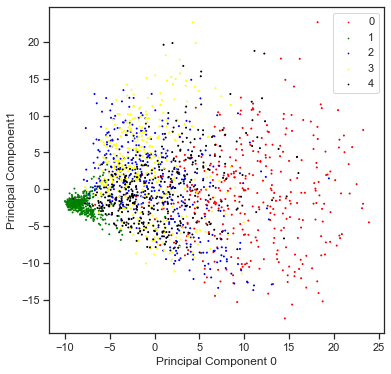

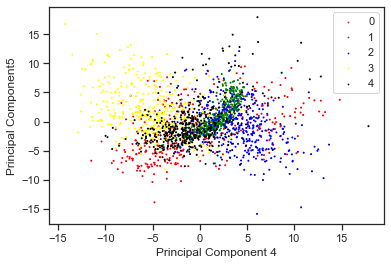

In [47]:
plt.figure(figsize =(6, 6))
for i in [0,4]:
    j = i+1
    for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
        plt.scatter(x_pca[:, i],x_pca[:, j],Y==l,c=c,label=l)
        plt.xlabel('Principal Component {}'.format(i))
        plt.ylabel('Principal Component{}'.format(j))
    plt.legend()
    plt.show()

<br/>Plot 1: First Principal Component vs. Second Principal Component
<li>In this plot, from the results obtained, we can observe that in all the five classes, every class is almost has complete scatteredness in the data and also there is more overlap in between the classes. But for Class 1, it is slightly seperated from remaining other classes and the most of the data is centered. Still in Class 1 also, there is mix of other classes as well.</li>
<br/>Plot 2: 5th Principal Component vs. 6th Principal Component
<li>Here in this plot, viewing the results, there is a lot of overlap in the classes. But they are not much scattered and almost more than half of the data for Class 3 is seperated from remaining classes. Same with the case of Class 0 and Class 2 also, but also overlapped with other classes data.</li>
<br/>Now comparing the above two plots, both did not seperate the data perfectly but in the 2nd plot, the classes are better distinguished than in the 1st plot.In 1st plot, all the classes are jumbled and are scattered. In 2nd plot, there is overlap of classes but they also have better distinguished data for each and every class when compared to the 1st plot.  

### Implementing (1)PCA and (2) dual PCA with singular value decomposition.

#### (1) PCA

In [48]:
import time

time_start1 = time.process_time()

In [49]:
Ud = X_std.T.dot(X_std)
eigenValues1,eigenVectors1 = np.linalg.eigh(Ud)
idx1 = eigenValues1.argsort()[::-1]   
eigenValues1 = eigenValues1[idx1]
eigenVectors1 = eigenVectors1[:,idx1]
eigenVectors1

array([[ 0.00197863,  0.00493308, -0.00037529, ...,  0.00294198,
        -0.00069225,  0.00178531],
       [ 0.00151307, -0.00640373,  0.00258725, ...,  0.00188671,
         0.0040447 ,  0.00479506],
       [-0.00049178, -0.00156563, -0.00372451, ...,  0.00838343,
         0.00090736, -0.00816424],
       ...,
       [-0.0001125 ,  0.00300533, -0.00335936, ...,  0.00055758,
        -0.00319481, -0.00498406],
       [-0.00132315,  0.00947149,  0.00553066, ...,  0.00186681,
        -0.00012294, -0.00351318],
       [ 0.00591181,  0.00287621,  0.00624184, ...,  0.0001313 ,
        -0.00054035,  0.00323845]])

In [50]:
x_pca =X_std.dot( eigenVectors1)
x_pca

array([[ 9.97069222e+00,  6.18172201e+00, -4.99286326e+00, ...,
        -2.84664097e-02,  6.97997657e-02,  7.44883255e-02],
       [ 1.14159998e+01,  6.94158705e+00, -5.06302886e+00, ...,
        -2.28147473e-01,  4.55949595e-02,  6.14775845e-02],
       [ 3.69011918e+00,  4.69309729e+00, -2.90865640e+00, ...,
         1.15182625e-01, -5.60241248e-03,  3.14112641e-02],
       ...,
       [-3.49421529e-01,  9.33681056e-01,  8.10744188e+00, ...,
        -6.93521885e-02, -8.49495279e-02, -1.65756817e-02],
       [-3.11526327e+00,  2.09047425e+00,  6.27251911e+00, ...,
         1.26995790e-01,  1.46191708e-02,  2.07556239e-03],
       [-5.64409375e+00, -2.46166632e-01,  4.14018317e+00, ...,
         1.57632818e-02, -1.77113186e-02, -1.11643749e-02]])

In [51]:
time_elapsed1 = (time.process_time() - time_start1)
print ("%5.4f secs" % (time_elapsed1))

0.8750 secs


#### (2) Dual PCA

In [52]:
import time

time_start2 = time.process_time()

In [53]:
Vd = X_std.dot(X_std.T)
eigenValues2,eigenVectors2 = np.linalg.eigh(Vd)
idx = eigenValues2.argsort()[::-1]   
eigenValues2 = eigenValues2[idx]
eigenVectors2 = eigenVectors2[:,idx]
eigVectors2 = eigenVectors2.T
eigVectors2

array([[ 0.03049267,  0.03491276,  0.01128523, ..., -0.00106861,
        -0.00952719, -0.01726094],
       [-0.02534817, -0.028464  , -0.01924406, ..., -0.00382856,
        -0.008572  ,  0.00100941],
       [ 0.02123528,  0.02153371,  0.01237089, ..., -0.03448198,
        -0.02667782, -0.01760873],
       ...,
       [ 0.        ,  0.01018733, -0.05208653, ..., -0.02327155,
         0.01676086, -0.03457612],
       [ 0.        ,  0.00331726,  0.13664443, ..., -0.02825754,
        -0.01956621, -0.00736107],
       [ 0.        ,  0.03246222,  0.40319794, ...,  0.01744983,
        -0.00655426, -0.01719975]])

In [54]:
D = np.sqrt(eigenValues1)
D

array([326.98648993, 243.87247788, 235.12109703, 222.29746927,
       211.07452792, 181.1632671 , 169.18897349, 156.83897246,
       148.37731915, 142.42787149, 137.1825035 , 130.82291136,
       124.20147308, 121.82306627, 120.38529302, 117.88078102,
       112.89193333, 111.59158993, 111.05209867, 108.92774083,
       107.2131376 , 105.0184084 , 104.71458733, 102.34548435,
       100.61333371,  98.93824632,  95.97262995,  95.73941705,
        95.05182483,  93.68070417,  93.09968515,  92.3709813 ,
        90.96044113,  89.736674  ,  88.82816206,  88.0926025 ,
        87.42025582,  85.88982271,  85.48351036,  84.72385613,
        83.52731925,  82.26354103,  81.24070557,  81.1322189 ,
        80.00713476,  78.79290552,  78.13802643,  77.86599615,
        76.67060831,  76.10602857,  75.73366306,  75.16077963,
        75.09149573,  73.83965934,  73.30754172,  72.786606  ,
        71.60394114,  71.35255368,  70.9633238 ,  70.55218135,
        70.19362604,  69.57767102,  69.08066222,  68.29

In [55]:
# create m x n Sigma matrix
Sigma = np.zeros((X_std.shape[1], X_std.shape[0]))
# populate Sigma with n x n diagonal matrix
Sigma[:X_std.shape[1], :X_std.shape[1]] = diag(D)
Sigma.shape

(784, 2066)

In [56]:
dual_xpca = eigVectors2.dot(Sigma.T)
dual_xpca

array([[ 9.97069222e+00,  8.51426049e+00,  2.65339669e+00, ...,
        -7.45466202e-02, -1.06891544e-01, -8.51131836e-02],
       [-8.28851045e+00, -6.94158705e+00, -4.52468517e+00, ...,
         6.81703213e-03, -2.81141400e-02, -5.80756418e-03],
       [ 6.94365096e+00,  5.25147853e+00,  2.90865640e+00, ...,
        -7.72971452e-03,  1.00920860e-02, -3.53127192e-02],
       ...,
       [ 0.00000000e+00,  2.48440963e+00, -1.22466429e+01, ...,
         3.03323774e-02,  3.36930798e-02,  8.56470662e-02],
       [ 0.00000000e+00,  8.08989427e-01,  3.21279890e+01, ...,
         5.33660707e-02, -9.15724031e-03, -7.99840362e-02],
       [ 0.00000000e+00,  7.91664301e+00,  9.48003423e+01, ...,
         6.44539208e-02, -6.85611288e-02,  4.74576859e-03]])

In [57]:
time_elapsed2 = (time.process_time() - time_start2)
print ("%5.1f secs" % (time_elapsed2))

  4.9 secs


#### Comparing the Computational times and Analysis

<br/>
<li>The computational time obtained for the Implementation of PCA is 0.8738 secs and the computational time obtained for the Implementation of dual PCA is $4.9$ secs.</li>
<li>The computational time is more for dual PCA compared with PCA, this is because, the Dual PCA has the floating point operations and the matrix multiplication is also with more number of samples.</li>
<br/>Analysis:
<li>For PCA with SVD the complexity of the algorithm is mostly due to the decomposition of eigenvalues and vectors which can be roughly $O(d^3)$</li>
<li>For Dual PCA with SVD, along with eigen decomposition generating sigma matrix has a complexity of $O(dn^2)$(big O of d*(n square)).</li>
<li>So, for this dataset, number of samples n is thrice the number of dimensions, the time taken by LDA tends to be more than that of PCA.</li>

## To prove that PCA is the best linear method for reconstruction:
### Solving with an Optimization Problem:
### Introduction:
<br/> Assume that we have a dataset of instances or data points $\{(x_i,y_i)\}_{i=1}^n$ with sample size n and dimensionality $x_i\in R^d$ and $y_i\in R^l$. The $\{x_i\}_{i=1}^n$ are the input data to the model and the $\{y_i\}_{i=1}^n$ are the observations (labels). We define $R^{dxn} \ni X:= [x_1,.....,x_n]$ and $R^{lxn} \ni Y:= [y_1,.....,y_n]$.
<br/> Assume we have a data point $x \in R^d$. We want to project this data point onto the vector space spanned by $p$ vectors ${u_1,....u_p}$ where each vector is $d$-dimensional and usually $p\ll d$. We stack these vectors in column-wise in matrix $U = [u_1,.....u_p] \in R^{dxp}$. In other words, we want to project $x$ onto the column space of $U$, denoted by $Col(U)$.
<img src="downloads/image.jpg" width = "200">The projection of $x \in R^d$ onto $Col(U) \in R^p$ and then its representation in the $R^d$ (its reconstruction) can be seen as a linear system of equations: $$R^d \in \hat{x} := U\beta\hspace{35pt}(1)$$  where we should find the unknown coefficients $\beta \in R^p$. If the $x$ lies in the $Col(U)$, this linear system has exact solution, so $\hat{x} = x = U\beta$. However, if $x$ doesnot lie in this space, there is no any solution $\beta$ for $x = U\beta$ and we should solve for $Eq.(1)$. In this case, $\hat{x}$ and $x$ are different and we have a residual:$$r = x-\hat{x} = x-U\beta\hspace{35pt}(2)$$
<br/> If there exists $n$ training data points, i.e.,  $\{x_i\}_{i=1}^n$, the projection of training data point $x$ is:$$R^p \in \tilde{x} := U^T\breve{x},$$ where $$R^d \in \breve{x} := x - \mu_x,\hspace{35pt}(3)$$ The reconstruction of the training data point $x$ after projection onto the PCA subspace is: $$R^d \in \hat{x} := UU^T\breve{x} + \mu_x,\hspace{35pt}(4)$$
<br/>where the mean is added back because it was removed before projection.
### Optimization problem:
#### Reconstruction Error in PCA:
<br/> If we center the data, the $Eq.(1)$ becomes $r = \breve{x} - \hat{x}$ because the reconstructed data will also be centered according to $Eq.(3)$ . According to $Eqs. (1),(2)$ and $(3)$, we have:$$r = x - \hat{x} = \breve{x} + \mu_x - UU^T\breve{x} - \mu_x = \breve{x} - UU^T\breve{x}\hspace{35pt}(5).$$
<br/> For $n$ data points, we have:$$R := X - \hat{X} = \breve{X} + \mu_x - UU^T\breve{X} - \mu_x = \breve{X} - UU^T\breve{X}\hspace{35pt}(6),$$ where $R^{dxn} \in R = [r_1,....,r_n]$ is the matrix of residuals. If we want to minimize the reconstruction error subject to the orthogonality of the projection matrix $U,$ we have:$$\mathop{minimize}_{\textbf{U}}\hspace{10pt}\|\breve{X} - UU^T\breve{X}\|_{F}^{2},$$$$subject\hspace{3pt}to\hspace{3pt}U^TU = I.$$The objective function can be simplified:
<br/>$\|\breve{X} - UU^T\breve{X}\|_{F}^{2}$
<br/>$=tr\Big( \big(\breve{X}-UU^T\breve{X}\big)^T\big(\breve{X}-UU^T\breve{X}\big)\Big)$
<br/>$=tr\Big( \big(\breve{X}^T - \breve{X}^TUU^T\big)\big(\breve{X}-UU^T\breve{X}\big)\Big)$
<br/>$=tr\Big(\breve{X}^T\breve{X} - 2\breve{X}^TUU^T\breve{X} + \breve{X}^TUU^TUU^T\breve{X}\Big)$
<br/>$=tr\Big(\breve{X}^T\breve{X} - \breve{X}^TUU^T\breve{X}\Big)\hspace{2pt}\big(Applying\hspace{3pt}\big(U^TU=I\big)\big)$
<br/>$=tr\Big(\breve{X}^T\breve{X}\Big) - tr\Big(\breve{X}^TUU^T\breve{X}\Big)$
<br/>$=tr\Big(\breve{X}^T\breve{X}\Big) - tr\Big(\breve{X}\breve{X}^TUU^T\Big)$
<br/> Using Lagrange multiplier, we have:
<br/>$\mathscr{L} = tr\Big(\breve{X}^T\breve{X}\Big) - tr\Big(\breve{X}\breve{X}^TUU^T\Big)$
<br/>$\hspace{15pt}- tr\Big(\Lambda^T\big(U^TU-I\big)\Big),$
<br/> where $\Lambda \in R{pxp}$ is a diagonal matrix $diag([\lambda_1,...,\lambda_p]^T)$ containing the Lagrange multipliers. Equating the derivative to Lagrangian to zero gives:
<br/>$R^{dxp} \ni \dfrac{\partial\mathscr{L}}{\partial U} = 2\breve{X}\breve{X}^TU - 2U\Lambda\stackrel{set}{=} 0$
<br/>$\Rightarrow\breve{X}\breve{X}^TU = U\wedge$
<br/>$\Rightarrow SU = UV,\hspace{5pt}\big(S=Covariance-matrix\big)$
<br/> which is again the eigenvalue problem for the Covariance matrix $S$. We had the same eigenvalue problem in PCA. Therefore, *PCA subspace is the best linear projection in terms of reconstruction error .*

## Fisher Discriminant Analysis (FDA)

### Plotting the scatter plot of the projected data with n_components = n_classes - 1

In [58]:
n_features = X.shape[1]
n_classes = len(np.unique(Y))
print(n_features)
print(n_classes)

784
5


In [59]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=4)
X_lda = sklearn_lda.fit_transform(X, Y)

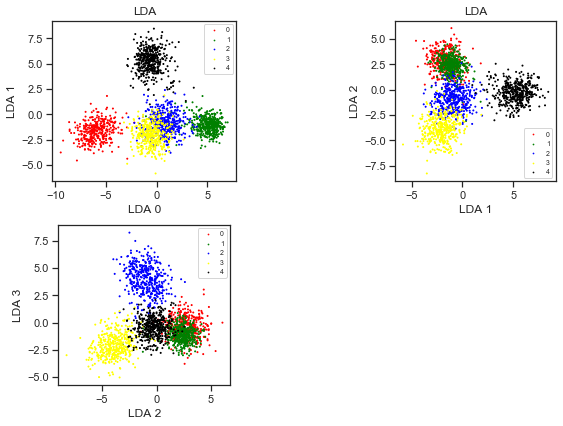

In [61]:
plt.figure(figsize = (10,6))
plt.subplot(2, 2, 1, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(X_lda[:, 0],X_lda[:, 1],Y==l,c=c,label=l)
    plt.title('LDA')
    plt.xlabel('LDA 0')
    plt.ylabel('LDA 1')
plt.legend(fontsize = 'x-small')
plt.subplot(2, 2, 2, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(X_lda[:, 1],X_lda[:, 2],Y==l,c=c,label=l)
    plt.title('LDA')
    plt.xlabel('LDA 1')
    plt.ylabel('LDA 2')
plt.legend(fontsize = 'x-small')
plt.subplot(2, 2, 3, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(X_lda[:, 2],X_lda[:, 3],Y==l,c=c,label=l)
    #plt.title('LDA')
    plt.xlabel('LDA 2')
    plt.ylabel('LDA 3')
plt.legend(fontsize = 'x-small')
plt.tight_layout(pad = 1.0)
plt.show()

#### Results obtained in terms of the known classes:
<br/>
<li>In the plot LDA 0 vs. LDA 1, The classes are well seperated and almost had good boundaries to every class. The clustering is better between the classes.But, there is some overlap in between the classes 2 and 3.</li>
<li>In the plot LDA 1 vs. LDA 2, The classes are distinguished but not as perfectly as the first plot. There is an overlap with each class to every other class. Class 0 and Class 1 are almost all overlapped with each other. Class 2 and 3 are partially overlapped with one another.</li>
<li>In the plot LDA 2 vs. LDA 3, The classes are overlapped with each other. Same as the plot 2, the Class 0 and Class 1 are more overlapped and Class 4 is partially overlapped with them.</li>

#### Which LDA directions are responsible for separating which classes?
<br/>
<li>Considering the plot LDA 0 vs. LDA 1, Class 0, Class 1 and Class 4 are well seperated than remaining other two classes.</li>
<li>Viewing the plot LDA 1 vs. LDA 2, Class 4 is well seperated from other classes. And also, if we observe the Class 2 and Class 3, they are also partially seperated. But overall, Class 4 is perfectly distinguished.</li>
<li>Observing the plot LDA 2 vs. LDA 3, Class 2 and Class 3 are perfectly distinguished from remaining three classes.</li>

### Comparing the results of LDA with the results obtained by using PCA:

<br/>
<li>Our intuition would naturally suggest that when the number of samples is large and representative for each class, LDA will outperform PCA.</li>
<li>Here in the practical comparison from the plots obtained, overall it shows that LDA is better in classifying the classes i.e., distinguishing the classes more clearly than that of PCA.</li>
<li>If we see in PCA, the classes are all around scattered and overlapped with one another. But in LDA, almost every class is atleast partially seperated from one another.</li>
<li>We can also say that the visual seperation is better in LDA than PCA.</li>

### Theoritical Analysis

<br/> Assume that we have a dataset of instances or data points $\{(x_i,y_i)\}_{i=1}^n$ with sample size n and dimensionality $x_i\in R^d$ and $y_i\in R^l$. The $\{x_i\}_{i=1}^n$ are the input data to the model and the $\{y_i\}_{i=1}^n$ are the observations (labels). We define $R^{dxn} \ni X:= [x_1,.....,x_n]$ and $R^{lxn} \ni Y:= [y_1,.....,y_n]$.If there are $n_t$ out-of-sample data points, $\{x_{t,i}\}_{1}^{n_t},$ we define $R^{dxn_t} \ni X_t := [x_{t,1},.....,x_{t,n_t}].$Usually, the data points exists on the subspace or sub-manifold.
<br/> If we have $n$ data points, $\{x_i\}_{i=1}^{n},$ which can be stored column-wise in a matrix $X \in R^{dxn},$ the projection and reconstruction of $X$ are defined as:$$R^{pxn} \ni \tilde{X} := U^TX,\hspace{30pt}(1)$$
$$R^{dxn} \ni \hat{X} := UU^TX = U\tilde{X},\hspace{30pt}(2)$$
<br/> In case we have $n_t$ out-of-sample data points, $\{x_{t,i}\}_{i=1}^{n_t},$ which can be stored column-wise in a matrix $X_t \in R^{dxn_t},$ the projection and reconstruction of $X_t$ are defined as:$$R^{pxn_t} \ni \tilde{X_t} := U^TX_t,\hspace{30pt}(3)$$ $$R^{dxn_t} \ni \hat{X_t} := UU^TX_t = U\tilde{X_t},\hspace{30pt}(4)$$
<br/> Considering the total scatter as the summation of the within and between scatters: $S_T = S_W + S_B \Rightarrow S_B = S_T - S_W\hspace{10pt}(a)$
<br/> In case the Fischer subspace is the span of several Fischer directions, $\{u_j\}_{j=1}^{p}$ where $u_j \in R^d,$ the $d_B$ and $d_W$ are defined as:$$R \ni d_B := tr(U^TS_BU),\hspace{6pt}where\hspace{2pt}d_B = distance\hspace{2pt}between\hspace{2pt}the\hspace{2pt}means\hspace{2pt}of\hspace{2pt}classes$$
$$R \ni d_W := tr(U^TS_WU),\hspace{6pt}where\hspace{2pt}d_W = summation\hspace{2pt}of\hspace{2pt}projection\hspace{2pt}variance\hspace{2pt}of\hspace{2pt}class\hspace{2pt}instances$$where $R^{dxp} \ni U = [u_1,....,u_p].$ In this case, maximizing the Fischer criterion is:$$\mathop{maximize}_{\textbf{U}}\hspace{10pt}f(U) := \dfrac{d_B(U)}{d_W(U)} = \dfrac{tr(U^TS_BU)}{tr(U^TS_WU)}\hspace{4pt}(5)$$
<br/> The Fischer criterion $f(U)$ is a generalized Rayleigh-Ritz Quotient. Thus, the optimization in $Eq.(5)$ is equivalent to:$$\mathop{maximize}_{\textbf{U}}\hspace{10pt}tr(U^TS_BU)$$$$subject\hspace{2pt}to\hspace{10pt}U^TS_WU = I.$$
<br/>The Lagrangian is:$$\mathscr{L} = tr(U^TS_BU) - tr\Big(\Lambda^T\big(U^TS_WU - I\big)\Big),$$ where $\Lambda \in R^{dxd}$ is a diagonal matrix whose diagonal entries are the Lagrange Multipliers. Equating the derivative of $\mathscr{L}$ to zero gives:$R^{dxp} \ni \dfrac{\partial\mathscr{L}}{\partial U} = 2S_BU - 2S_WU\Lambda\stackrel{set}{=} 0$ 
<br/>$\hspace{3pt}\Rightarrow 2S_BU = 2S_WU\Lambda \Rightarrow S_BU = S_WU\Lambda,$ 
<br/>which is a generalized eigenvalue problem $(S_B,S_W).$ The columns of $U$ are the eigenvectors sorted by largest to smallest eigenvalues and the diagonal entries of $\Lambda$ are the corresponding eigenvalues. The columns of $U$ are referred to as the *Fischer directions.* The projection and reconstruction are according to $Eqs. (1)$ and $(2),$ respectively. The out-of-sample projection and reconstruction are according to $Eqs. (3)$ and $(4),$ respectively.
<br/> One way to find the FDA directions is to consider another version of Fischer criterion. According to $Eq. (a)$ for $S_B,$ the Fischer criterion becomes:$$f(U) = \dfrac{tr\Big(U^T\big(S_T - S_W\big)U\Big)}{tr(U^TS_WU)} = \dfrac{tr(U^TS_TU)}{tr(U^TS_WU)} - 1$$ 
<br/> The -1 is a constant and is dropped in the optimization; therefore:$$\mathop{maximize}_{\textbf{U}}\hspace{10pt}tr(U^TS_TU)$$$$subject\hspace{2pt}to\hspace{10pt}U^TS_WU = I.$$

#### Comparing FDA with the optimization in PCA:

<br/>
<li>The FDA directions capture the directions where the instances of different classes fall apart and the instances in one class fall close to each other.</li>
<li>On the other hand, the PCA directions capture the directions where the data have maximum variance (spread) regardless of the class.</li>
<li>In some datasets, the FDA and PCA are parallel and in some datasets, they are orthogonal.</li>
<li>Even there are other cases along with these two cases for some other datasets.</li>
<br/> The following figure shows comparison between FDA and PCA considering all the cases. 
<img src="downloads/image2.jpg" width = "200">

### References:
<br/>
<ol>
    <br/>Optimization of PCA and, FDA
    <li>https://arxiv.org/pdf/1906.09436.pdf</li>
    <li>https://arxiv.org/pdf/1906.03148.pdf</li>
    <br/>PCA
    <li>https://www.analyticsvidhya.com/blog/2017/05/comprehensive-guide-to-linear-algebra/</li>
    <li>https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/</li>
    <li>https://towardsdatascience.com/principal-component-analysis-pca-101-using-r-361f4c53a9ff</li>
    <li>https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues</li>
    <li>https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/</li>
    <li>https://sebastianraschka.com/Articles/2014_pca_step_by_step.html</li>
    <li>http://ethen8181.github.io/machine-learning/dim_reduct/PCA.html</li>
    <li>https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60</li>
    <li>https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html</li>
    <li>https://pathmind.com/wiki/eigenvector</li>
    <li>https://medium.com/journey-2-artificial-intelligence/unraveling-pca-principal-component-analysis-in-python-d23b081409cf</li>
    <li>https://www.python-course.eu/principal_component_analysis.php</li>
    <li>https://www.geeksforgeeks.org/ml-principal-component-analysispca/</li>
    <li>http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/</li>
    <li>http://www.cs.cmu.edu/~02317/slides/lec_6.pdf</li>
    <li>https://www.cs.cmu.edu/~tom/10701_sp11/hw/5/hw5_sol.pdf</li>
    <li>https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html</li>
    <li>https://stackoverflow.com/questions/53991999/how-important-are-the-rows-vs-columns-in-pca</li>
    <li>https://districtdatalabs.silvrback.com/principal-component-analysis-with-python</li>
    <li>http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html</li>
    <li>https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/</li>
    <li>https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html</li>
    <li>https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html</li>
    <li>https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/</li>
    <li>https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python</li>
    <li>https://gist.github.com/johntyree/8785541</li>
    <li>https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe</li>
    <li>https://blogs.sas.com/content/iml/2017/08/02/retain-principal-components.html</li>
    <li>https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c</li>
    <li>http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/</li>
    <li>http://www.vfirst.com/blog/techfirst/dimension-reduction-techniques-pca-vs-lda-in-machine-learning-part-2/</li>
    <li>https://www.uwo.ca/fhs/tc/labs/10.FactorAnalysis.pdf</li>
</ol>

# Nonlinear Dimensionality Reduction

### 1.

In [62]:
#Importing the libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv("C:/Users/Samhithachowdary/.ipynb_checkpoints/DataB.csv")
X = data.iloc[:, 1:785 ].values
Y = data.iloc[:, 785].values
print(X.shape)
print(Y)
print(data.shape)

(2066, 784)
[0 0 0 ... 4 4 4]
(2066, 786)


In [64]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf', random_state = 42)
k_pca = kpca.fit_transform(X)
k_pca.shape

(2066, 2)

In [65]:
import time

time_start1 = time.process_time()

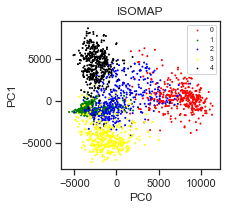

In [66]:
from sklearn.manifold import Isomap
imap = Isomap(n_components = 2)
i_map = imap.fit_transform(X)
i_map.shape
plt.figure(figsize = (10,6))
plt.subplot(2, 3, 2, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(i_map[:, 0],i_map[:, 1],Y==l,c=c,label=l)
    plt.title('ISOMAP')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize = 'x-small')
plt.show()


In [67]:
time_elapsed1 = (time.process_time() - time_start1)
print ("%5.4f secs" % (time_elapsed1))

11.4844 secs


In [68]:
from sklearn.manifold import LocallyLinearEmbedding
xlle = LocallyLinearEmbedding(n_components = 2)
x_lle = xlle.fit_transform(X)
x_lle.shape

(2066, 2)

In [69]:
from sklearn.manifold import SpectralEmbedding
xspectral = SpectralEmbedding(n_components = 2, random_state = 42)
x_laplacian = xspectral.fit_transform(X)
x_laplacian.shape

(2066, 2)

In [70]:
import time

time_start2 = time.process_time()

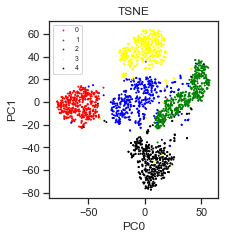

In [71]:
from sklearn.manifold import TSNE
xtsne = TSNE(n_components = 2, random_state = 42)
x_tsne = xtsne.fit_transform(X)
x_tsne.shape
plt.figure(figsize = (10,6))
plt.subplot(2, 3, 5, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(x_tsne[:, 0],x_tsne[:, 1],Y==l,c=c,label=l)
    plt.title('TSNE')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize='x-small')
plt.tight_layout(pad = 1.0)
plt.show()

In [72]:
time_elapsed2 = (time.process_time() - time_start2)
print ("%5.4f secs" % (time_elapsed2))

29.5156 secs


### 2.

### Scatter plot of the Embeddings

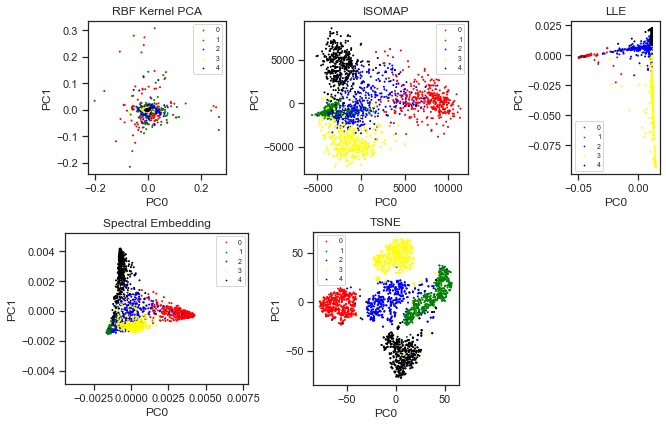

In [73]:
#KERNEL PCA
plt.figure(figsize = (10,6))
plt.subplot(2, 3, 1, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(k_pca[:, 0],k_pca[:, 1],Y==l,c=c,label=l)
    plt.title('RBF Kernel PCA')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize = 'x-small')
#plt.show()
#ISOMAP
plt.subplot(2, 3, 2, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(i_map[:, 0],i_map[:, 1],Y==l,c=c,label=l)
    plt.title('ISOMAP')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize = 'x-small')
#plt.show()
#LOCALLY LINEAR EMBEDDING
plt.subplot(2, 3, 3, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(x_lle[:, 0],x_lle[:, 1],Y==l,c=c,label=l)
    plt.title('LLE')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize='x-small')
#plt.show()
#SPECTRAL EMBEDDING
plt.subplot(2, 3, 4, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(x_laplacian[:, 0],x_laplacian[:, 1],Y==l,c=c,label=l)
    plt.title('Spectral Embedding')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize='x-small')
#plt.show()
#T-SNE
plt.subplot(2, 3, 5, aspect='equal')
for l,c in zip((np.unique(Y)),['red','green','blue','yellow','black']):
    plt.scatter(x_tsne[:, 0],x_tsne[:, 1],Y==l,c=c,label=l)
    plt.title('TSNE')
    plt.xlabel('PC0')
    plt.ylabel('PC1')
plt.legend(fontsize='x-small')
plt.tight_layout(pad = 1.0)
plt.show()

### Three clear performance differences between a pair of methods that can be explained based on the nature of methods and the data

#### Comparing the methods Isomap and t-SNE, the following are the three Performances differences:
<br/>
<li>Computational performance of Isomap is very much better than that of t-SNE.</li>
<li>As calculated from above, the time taken to fit the model for ISOMAP is 10.8281 secs whereas the time taken to fit the model for t-SNE is 27.3125 which is nearly more than double the computational time of Isomap. So, Isomap is twice as fast as t-SNE.</li>
<li>Clustering Representation: When considered the scatter plot of t-SNE, we can observe that the clusters are more clear with good boundaries, whereas in Isomap, the clusters are overlapped with no perfect boundaries.</li>
<li>The ability to retain local structure of data: t-SNE model is based on the local approaches which tend to maintain the local geometrical structure in lower dimensional space. Whereas Isomap is based on the global approaches.</li>
<br/>Also, ISOMAP preserved the U-shaped continuum while showing better resolution which shows the interrelatedness between these subsets. In contrast, t-SNE showed geometrically distinct clusters at much higher resolution.

#### Tradeoffs needed to be considered:
<br/>
<li>Considering the ability to retain the local structure of data, the choice has to be made if whether one has to retain local structure or Global structure.</li>
<li>If clear clustering with good boundaries is needed, one has to choose t-SNE rather than Isomap.</li>

### References:
<br/>
<ol>
    <br/>k-PCA
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html</li>
    <li>https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_with_kernel_pca/</li>
    <br/>Isomap
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html</li>
    <li>https://www.programcreek.com/python/example/101759/sklearn.manifold.Isomap</li>
    <li>https://gist.github.com/Mashimo/b8a8d4dc18bf6875c8547134b543898f</li>
    <br/>LLE
    <li>https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html</li>
    <br/>Laplacian
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html</li>
    <br/>t-SNE
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html</li>
    <li>https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b</li>
<ol>